<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Project: Loan Default Prediction

**Phillipe Vilaça Gomes** <br>
- phillipe.vilaca@gmail.com
- https://www.linkedin.com/in/phillipegomes/
- https://scholar.google.com/citations?user=xY6VjEUAAAAJ&hl=en

## Table of Content
**[1. Problem Definition](#M1)** <br>
&emsp; **[1.1 The Context](#M1.1)** <br>
&emsp; **[1.2 The Objectives](#M1.2)** <br>
&emsp; **[1.3 The Key Questions](#M1.3)** <br>
&emsp; **[1.4 The Problem Formulation](#M1.4)** <br>
**[2. Exploratory Data Analysis (EDA) and Visualization](#M2)** <br>
&emsp; **[2.1 Data Dictionary](#M2.1)** <br>
&emsp; **[2.2 Data Description](#M2.2)** <br>
&emsp; **[2.3 Univariate Analysis - Numerical Data](#M2.3)** <br>
&emsp; **[2.4 Univariate Analysis - Categorical Data](#M2.4)** <br>
&emsp; **[2.5 Bivariate Analysis](#M2.5)** <br>
&emsp; **[2.6 Multivariate Analysis](#M2.6)** <br>
&emsp; **[2.7 Key fixes](#M2.7)** <br>
&emsp; **[2.8 Summary of Notes](#M2.8)** <br>
**[3. Proposed Approach](#M3)** <br>
&emsp; **[3.1 Potential Techniques](#M3.1)** <br>
&emsp; **[3.2 Overall solution design](#M3.2)** <br>
&emsp; **[3.3 Measures of success](#M3.3)** <br>
**[4. Model Building](#M4)** <br>
&emsp; **[4.1 Data preparation](#M4.1)** <br>
&emsp; **[4.2 Model Evaluation Function](#M4.2)** <br>
**[5. Logistic Regression (Log Reg) Model](#M5)** <br>
&emsp; **[5.1 Log Reg](#M5.1)** <br>
&emsp; **[5.2 Log Reg with Balanced Precision-Recall](#M5.2)** <br>
&emsp; **[5.3 Log Reg with Scaled Feature](#M5.3)** <br>
&emsp; **[5.4 Log Reg with Scaled Feature and Balanced Precision-Recall](#M5.4)** <br>
&emsp; **[5.5 Overview of Log Reg Results](#M5.5)** <br>
**[6. Decision Tree (DT) Model](#M6)** <br>
&emsp; **[6.1 DT with Default Hyperparameters](#M6.1)** <br>
&emsp; **[6.2 DT with Tuned Hyperparameters](#M6.2)** <br>
&emsp; **[6.3 Overview of DT Results](#M6.3)** <br>
**[7. Random Forest (RF) Model](#M7)** <br>
&emsp; **[7.1 RF with Default Hyperparameters](#M7.1)** <br>
&emsp; **[7.2 RF with Tuned Hyperparameters](#M7.2)** <br>
&emsp; **[7.3 Overview of RF Results](#M7.3)** <br>
**[8. Comparing Model Performances](#M8)** <br>
**[9. Conclusion and Busines Recommendations](#M9)** <br>
&emsp; **[9.1 Answering the Key Questions](#M9.1)** <br>
&emsp; **[9.2 Busines Recommendations](#M9.2)** <br>
&emsp; **[9.3 Expected Benefits](#M9.3)** <br>
&emsp; **[9.4 Risks and Challenges](#M9.4)** <br>

<a id="M1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">1. Problem Definition

<a id="M1.1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">1.1 The context

- This problem is related to **home loans**, one of the most crucial credit lines to increase banks' profits. <br>
- As defaulters can reduce drastically the mentioned profit, banks often establish a process to **avoid bad loans (NPA)**.
- In this process, the bank checks **a considerable variety of attributes** and came up with a decision. 
- This process requires a lot of human resources and it is considered effort-intensive, which can lead to **impaired judgment**.
- Therefore, many banks are trying to automate this process in a **free of bias and efficient way**.
- However, as these automatic procedures are based on datasets, one important thing to ensure is that **the bad behaviors in these datasets, due to errors in the human approval process, are excluded in the new and automatic procedure**.

<a id="M1.2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">1.2 The objectives

- Build a **classification model** to predict clients who are likely to default on their loan and give **recommendations to the bank on the important features** to consider while approving a loan.
- The classification model must be **interpretative**.
- The classification model must be **free of bias** that may be present in the dataset (due to previous bad decisions)

<a id="M1.3"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">1.3 The Key Questions

- **Key question 1**: What drives loan default?  <br>
- **Key question 2**: What factors can be important to identify loan defaulters? <br>
- **Key question 3**: How to model loan default as a function of other variables? <br>
- **Key question 4**: How to use this model to automate the decisions of loan approval? <br>
- **Key question 5**: How to cut down on losses by loan defaults? <br>

<a id="M1.4"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">1.4 The Problem Formulation

- Based on the data obtained via the existing loan: <br>
    - There are **12 features** for each applicant. <br>
    - The **target is a binary variable** indicating if the applicant has defaulted or not. (0 means loan repaid and 1 means client defaulted on loan) <br>
- **Problem formulation**: Build a model able to predict clients likely to default on their loan (i.e; predict the *target variable Y* based on the *features X*).

<a id="M2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">2. Exploratory Data Analysis (EDA) and Visualization

**Importing libraries**

In [1]:
# Scientific Computing
import numpy as np

# Data Analysis
import pandas as pd

# Plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Statistical Data Visualization
import seaborn as sns

# Efficient tools for machine learning and statistical modeling
from sklearn import tree

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler 

# To split matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id="M2.1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">2.1 Data Dictionary

The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 13 input variables (12 features and the target) were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

<a id="M2.2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">2.2 Data Description

**Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

**Copying data to another variable to avoid any changes to the original data**

In [3]:
data=hm.copy()

**Displaying first and last five rows**

In [4]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 1**: There are some features with missing values, it's necessary to dig deeper into this matter.

**Understanding the shape of the dataset**

In [5]:
data.shape

(5960, 13)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 2**: The dataset has 5960 approved loans.

**Checking the data types of the columns in the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 3**: `REASON` and `JOB` are of object type while the rest of the columns are of numeric type. <br>
**Note 4**: `BAD` is a binary variable and it represents a classification. It will be the target variable. 

**Dealing with missing values**

In [7]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [8]:
print('The percentage of missing values in the each column is: ')
print(round((100*data.isnull().sum()/len(data)),2))

The percentage of missing values in the each column is: 
BAD         0.00
LOAN        0.00
MORTDUE     8.69
VALUE       1.88
REASON      4.23
JOB         4.68
YOJ         8.64
DEROG      11.88
DELINQ      9.73
CLAGE       5.17
NINQ        8.56
CLNO        3.72
DEBTINC    21.26
dtype: float64


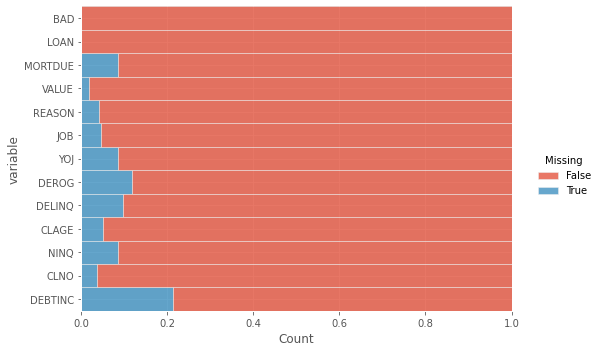

In [9]:
sns.displot(
    data=data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    aspect=1.5
);

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 5**: `DEBTINC` is the feature with more missing values (21.26\%), `DEROG` has 11.88\%, `NINQ`, `MORTDUE`, `YOJ` and `DELINQ` have between 8-10\% of missing values, while `VALUE`, `REASON`, `JOB`, `CLAGE` and `CLNO` have less than 5.17% of missing values.

**Converting the object type columns to categories (to reduce space)**

In [10]:
#converting "objects" to "category" reduces the data space required to store the dataframe

cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('BAD')

for i in cols:
    data[i] = data[i].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


**Checking for duplicate values**

In [11]:
data.duplicated().sum()

0

**Summary Statistics of the dataset for numerical variables**

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 6**: Regarding the applications: <br>
- The average amount of **loan approved** is about 18.5k. <br>
- Only 25% of the **approved loans** were over ~23.3k. <br>
- The average **amount due on the existing mortgage** is about 73.7k. <br>
- The average **current value of the property** is about 101.7k. <br>
- Only 25% of the **property values** were over ~119.8k. <br>
- The average **longevity at the present job** by applicants is about 9 years. <br>
- 75% of the applicants had been **working at the same job for** at least 3 years. <br>
- At least 75% of applications didn't present any **major derogatory report**. <br>
- At least 75% of applications didn't present any **delinquent credit lines**. <br>
- The average **age of the oldest credit line** is about 180 months. <br>
- At least 25% of the applications didn't present any **recent credit inquiries**. <br>
- 25% of the applications had more than 26 **existing credit lines**. <br>
- The average **debt-to-income ratio** is about 33.7.  
- At least 75% of the applications present a **debt-to-income ratio** inferior to 39, but there are some spikes and the maximum value is ~203.

**Summary Statistics of the dataset for categorical variables**

In [13]:
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**looking at the unique values in all the categorical variables**

In [14]:
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('The percentage of unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize = True))
    print('*'*40)

The percentage of unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
The percentage of unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
The percentage of unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 7**: Regarding the applications: <br>
- **BAD** has ~80% of zeros (meaning loan repaid) and only ~20% of ones (meaning client defaulted on loan). <br>
- The **main reason for the loan request** is DebtCon (about 69% of applications). <br>

<a id="M2.3"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">2.3 Univariate Analysis - Numerical Data

- In this section, convenient graphs are shown in order to get more insights into the numerical features.
- Order of analysis: LOAN, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, and DEBTINC.
- When the numerical feature can have a large range and it presents several observations over this range, we gonna use a boxplot and histogram in order to study their central tendency and dispersion.
- When the feature presents observations concentrated in one or more few values, we gonna use a barplot indicating the percentage of observations for each value.

In [15]:
# Defining the hist_box() function

def hist_box(feature, data):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(15,10))
    sns.set(style='darkgrid')
    # Adding a graph in each part
    sns.boxplot(data[feature], ax=ax_box, showmeans=True)
    sns.distplot(data[feature], ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--', label = 'Mean') # Green line corresponds to the mean in the plot
    ax_hist.axvline(data[feature].median(), color='orange', linestyle='-', label = 'Median') # Orange line corresponds to the median in the plot
    plt.legend()
    plt.show()

In [16]:
# Function to create barplots that indicate percentage for each category/value.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

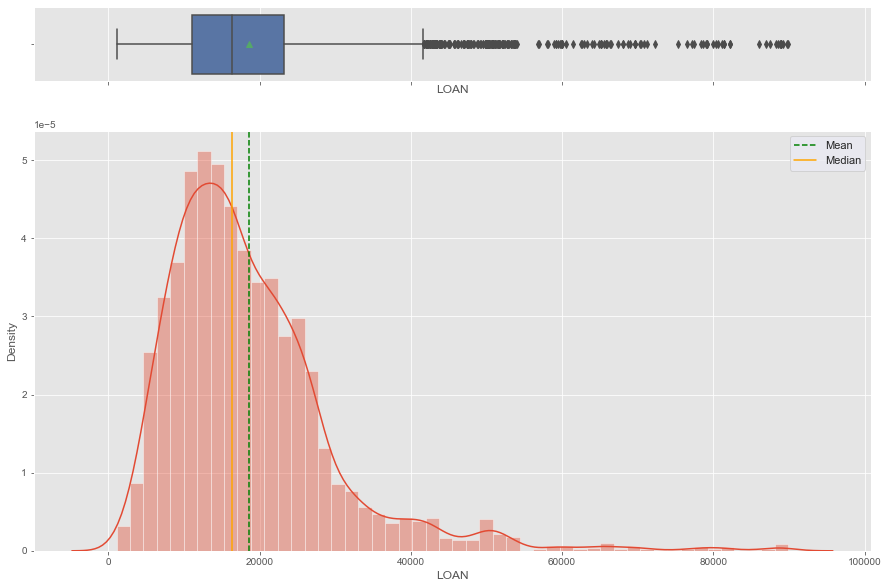

In [17]:
hist_box('LOAN', data)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 8**: - `LOAN` is close to a symmetrical distribution.

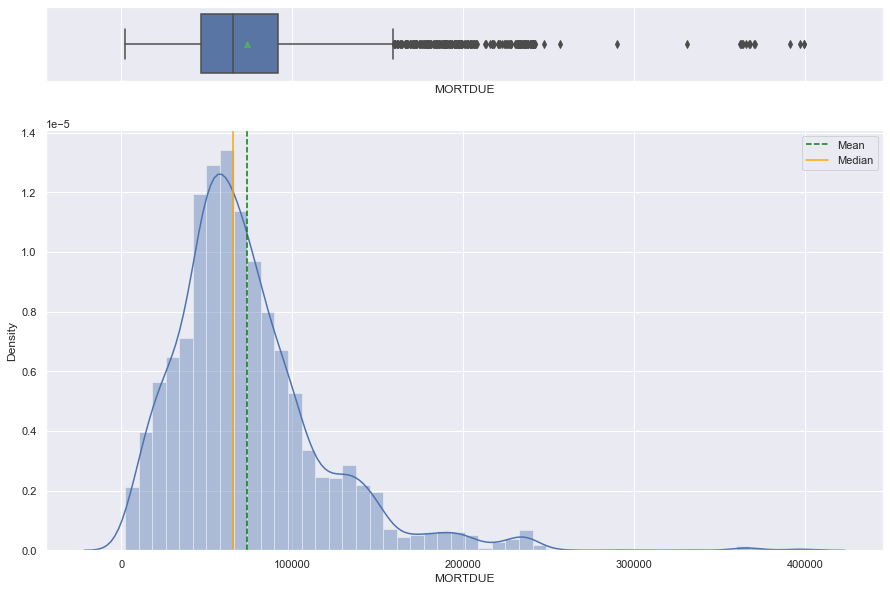

In [18]:
hist_box('MORTDUE', data)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 9**: `MORTDUE` has a right-skewed distribution, meaning only a few applications had high amount due on the existing mortgage. 

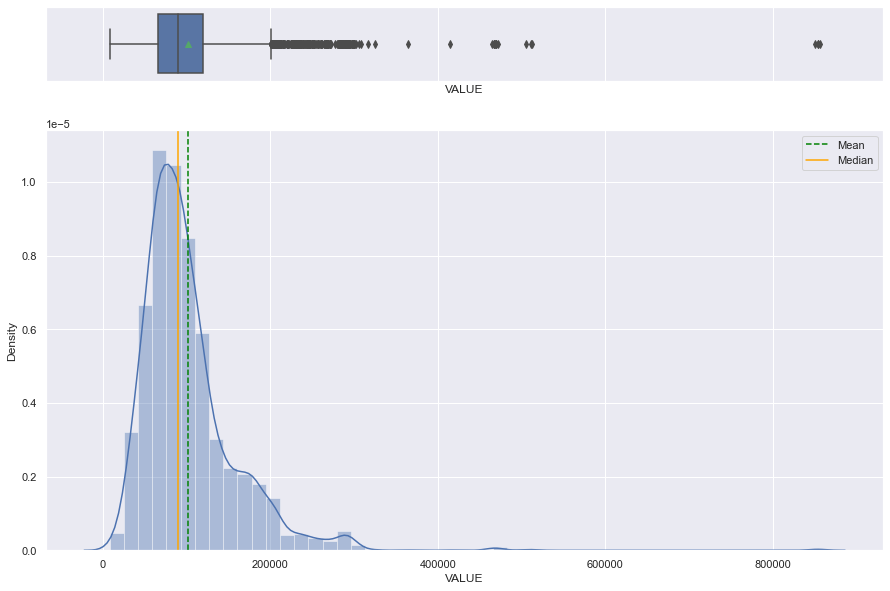

In [19]:
hist_box('VALUE', data)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 10**: Only a few number of applications had the current value of the property above 200k. This corroborates with **Note 6** which states that *only 25% of the property values were over ~119.8k*.

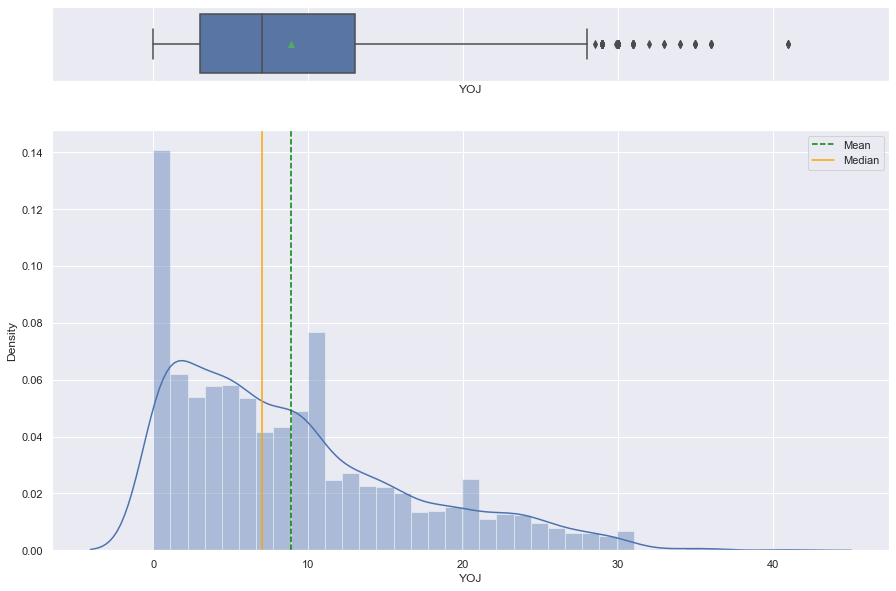

In [20]:
hist_box('YOJ', data)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 11**: A lot of applicants had new jobs.

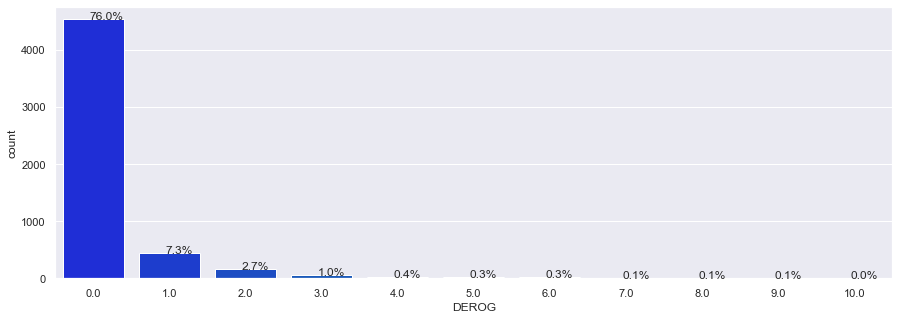

In [21]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 12**: 76% of applications didn't present any major derogatory report. This corroborates with **Note 6** which states that *at least 75% of applications didn't present any major derogatory report*.

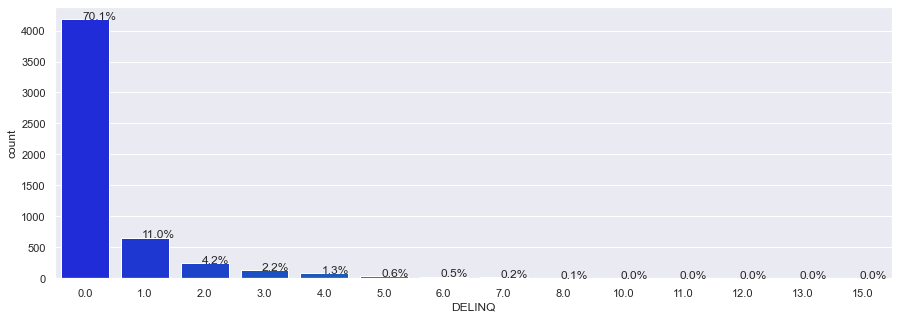

In [22]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 13**: 70.1% of applications didn't present any delinquent credit lines. This corroborates with **Note 6** which states that *at least 75% of applications didn't present any delinquent credit lines*.

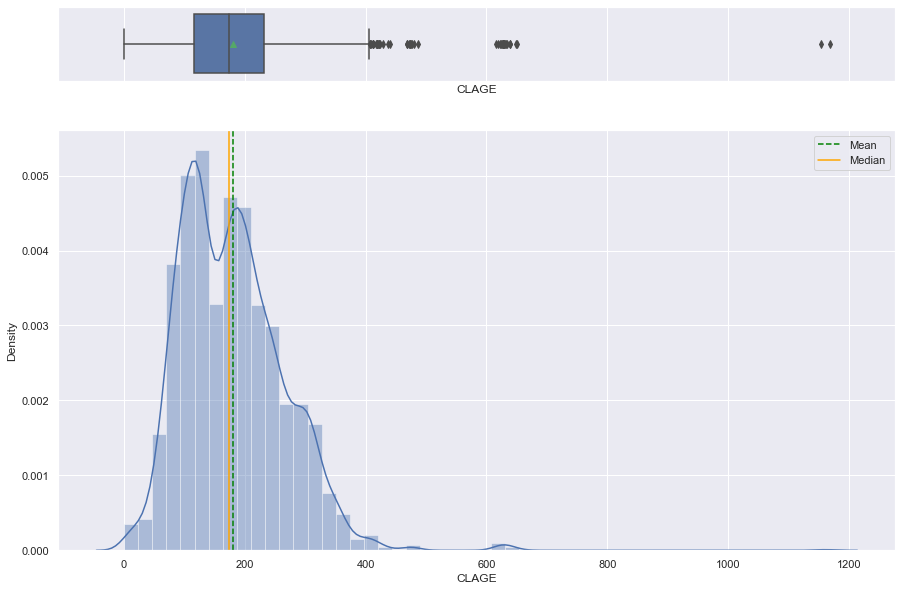

In [23]:
hist_box('CLAGE', data)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 14**: `CLAGE` is close to a symmetrical distribution

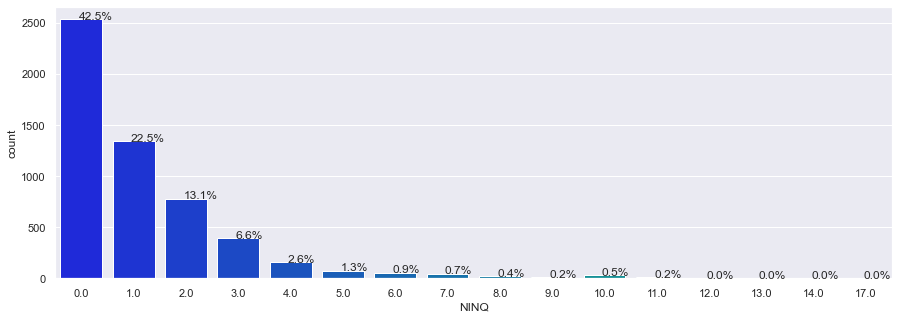

In [24]:
#Build barplot for NINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 15**: 42.5% of the applications didn't present any recent credit inquires. This corroborates with **Note 6** which states that *at least 25% of the applications didn't present any recent credit inquires*.

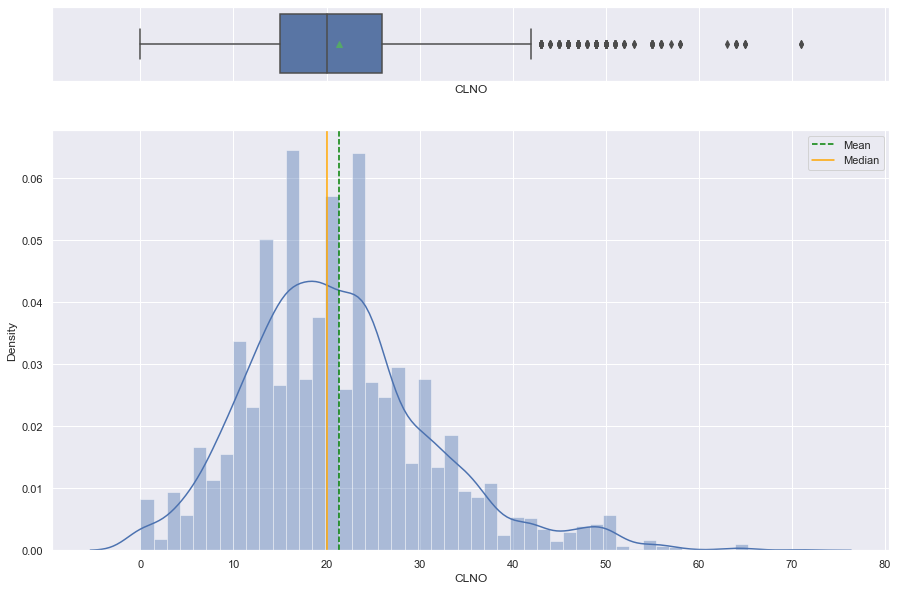

In [25]:
hist_box('CLNO', data)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 16**: `CLNO` is close to a symmetrical distribution.

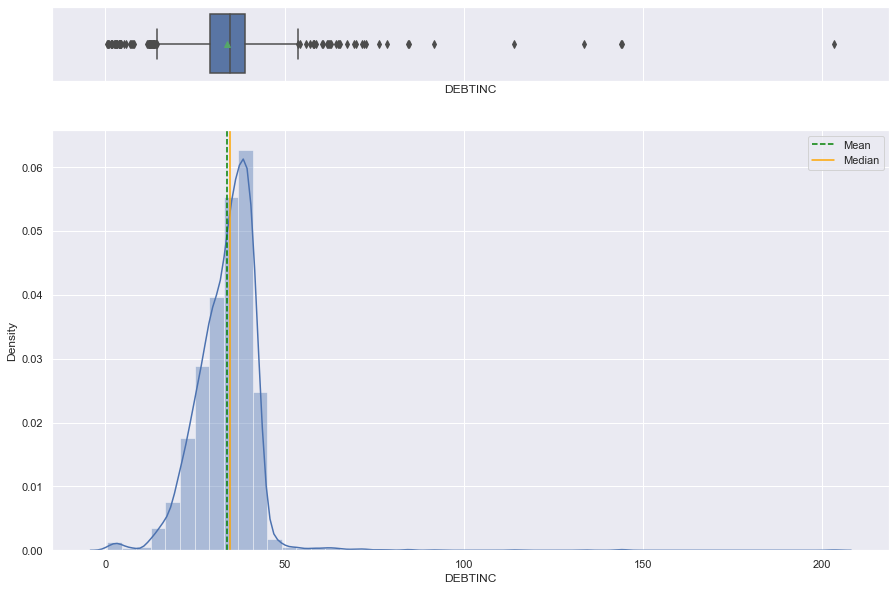

In [26]:
hist_box('DEBTINC', data)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 17**: `DEBTINC` presents a pretty symmetrical distribution between 0 and 80.

<a id="M2.4"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">2.4 Univariate Analysis - Categorical Data

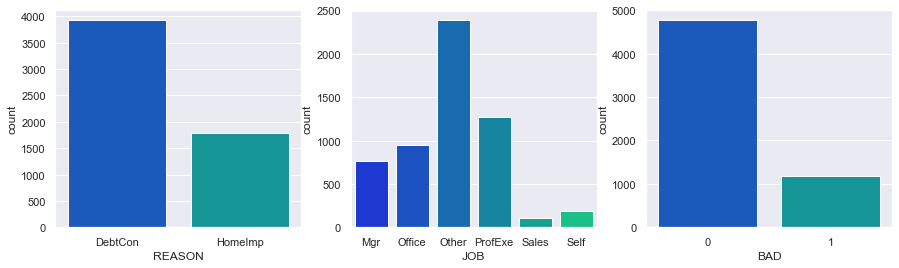

In [27]:
plt.figure(figsize = (15, 4))
plt.subplot(131)
ax = sns.countplot(data["REASON"],palette='winter')
plt.subplot(132)
ax = sns.countplot(data["JOB"],palette='winter')
plt.subplot(133)
ax = sns.countplot(data["BAD"],palette='winter')

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 18**: <br>
- The main reason applicants request the loan is **DebtCon**. <br>
- The less usual job when requiring the loan is **Sales**. <br>
- There are much more **loans repaid** than **clients defaulted on the loan**. <br>

<a id="M2.5"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">2.5 Bivariate Analysis

**BAD vs Continuous Variables**

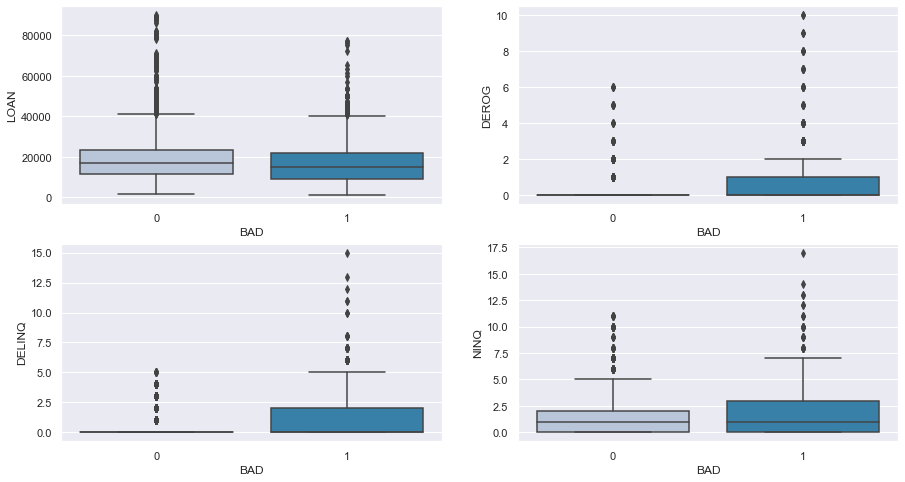

In [28]:
plt.figure(figsize = (15, 8))
plt.subplot(221)
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu");
plt.subplot(222)
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu");
plt.subplot(223)
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu");
plt.subplot(224)
sns.boxplot(data["BAD"],data['NINQ'],palette="PuBu");

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 19**: <br>
- The amount of loan approved seems to be unrelated to default. <br>
- The number of derogatory reports is much larger in clients who defaulted on the loan. <br>
- The number of delinquent credit lines is much larger in clients who defaulted on the loan. <br>
- The number of recent credit lines is much larger in clients who defaulted on the loan.

**Two Continuous Variables**

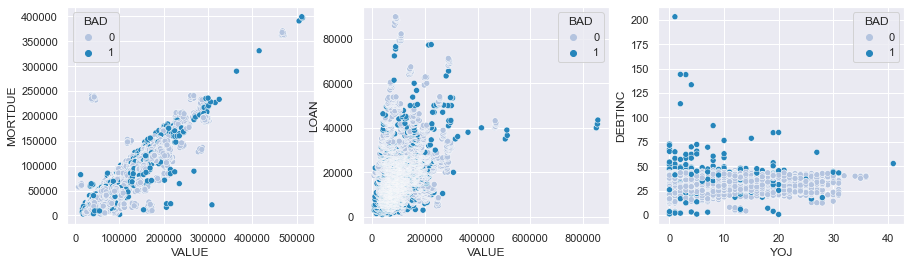

In [29]:
plt.figure(figsize = (15, 4))
plt.subplot(131)
sns.scatterplot(data["VALUE"],data['MORTDUE'], hue=data['BAD'], palette="PuBu");
plt.subplot(132)
sns.scatterplot(data["VALUE"],data['LOAN'], hue=data['BAD'], palette="PuBu");
plt.subplot(133)
sns.scatterplot(data["YOJ"],data['DEBTINC'], hue=data['BAD'], palette="PuBu");

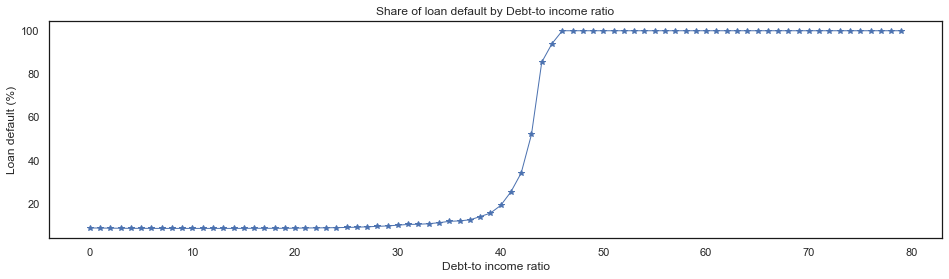

In [30]:
perc_def = []
for i in range(80):
    perc_def.append(data[data.DEBTINC>i].BAD.value_counts(normalize = True,  sort=False)[1])

dfp = pd.Series(perc_def)  
dfp = 100*dfp
fig = plt.figure(figsize=(16,4))
ax = dfp.plot(lw=1, marker='*', title='Share of loan default by Debt-to income ratio')
ax.set(xlabel='Debt-to income ratio', ylabel='Loan default (%)');
ax.set_facecolor("white");
plt.setp(ax.spines.values(), color='k')
plt.grid(True)
plt.show()

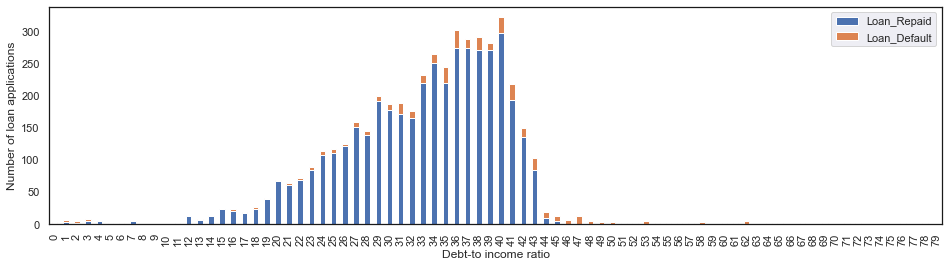

In [31]:
bad_pay = []
god_pay = []
for i in range(80):
    god_pay.append(data[(data.DEBTINC>i)&(data.DEBTINC<i+1)].BAD.value_counts(sort=False)[0])
    bad_pay.append(data[(data.DEBTINC>i)&(data.DEBTINC<i+1)].BAD.value_counts(sort=False)[1])
dfp2 = pd.DataFrame({'Loan_Repaid': god_pay,
                   'Loan_Default': bad_pay})
ax2 = dfp2.plot.bar(stacked=True, figsize=(16,4));
ax2.set_facecolor("white");
plt.setp(ax2.spines.values(), color='k')
ax2.set(xlabel='Debt-to income ratio', ylabel='Number of loan applications');

<a id="N20"> </a>
<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 20**: <br>
- The amount due on the existing mortgage grows with the current value of the property, which is completely expected. <br>
- Customers with a high Debt-to income ratio tend to become defaulted on loans.
    - 93% of customers with a Debt-to income ratio lower than 25 can afford the loan.
    - Roughly 50% of customers with a Debt-to income ratio higher than 43 have defaulted on the loan.
    - Customers with a Debt-to income ratio higher than 45 have always defaulted on the loan.   

**BAD vs Categorical Variables**

In [32]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x, Y):
    # Y is the target variable
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,Y,margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,Y,normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


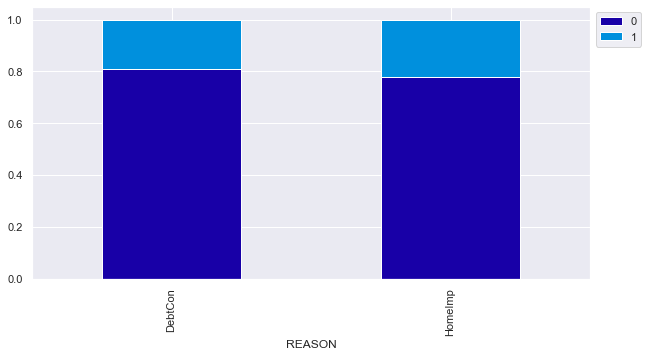

In [33]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'], data['BAD'])

<a id="N21"> </a>
<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 21**: <br>
    - The reason why the loan is required does not interfere with default.

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


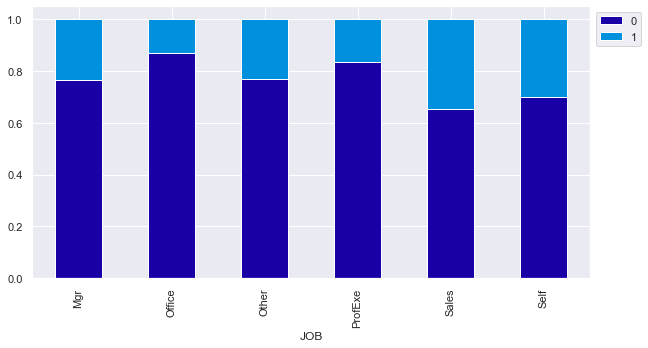

In [34]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['JOB'], data['BAD'])

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


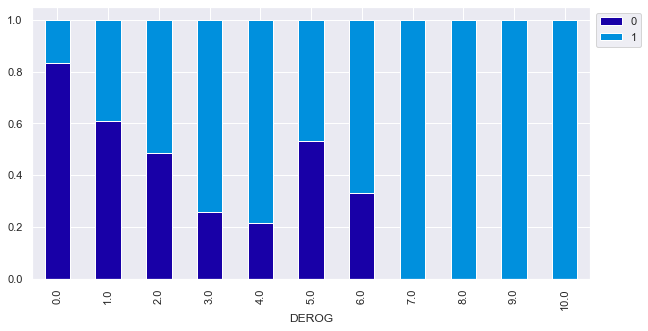

In [35]:
# Plot stacked bar plot for BAD and DEROG
stacked_plot(data['DEROG'], data['BAD'])

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 22**: <br>
- Applications from sales industry have a stronger impact on deliquency. <br>
- Customer whose DEROG is more than 3 have more chances of defaulting.

<a id="M2.6"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">2.6 Multivariate Analysis

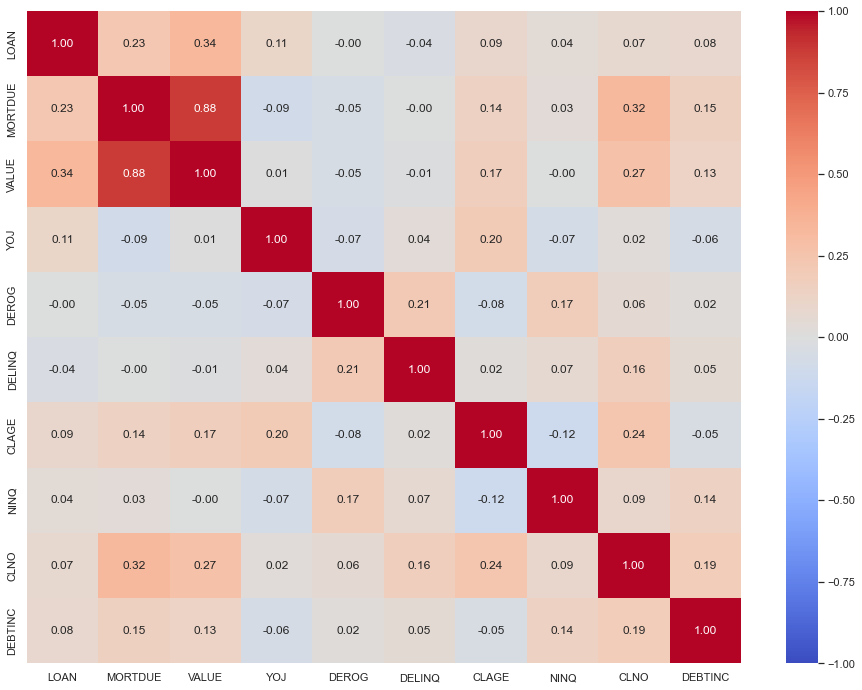

In [36]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data[numerical_col].corr()
# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1, annot = True,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 23**: <br>
    - The higher correlation is between the `MORTDUE` and `VALUE` features.

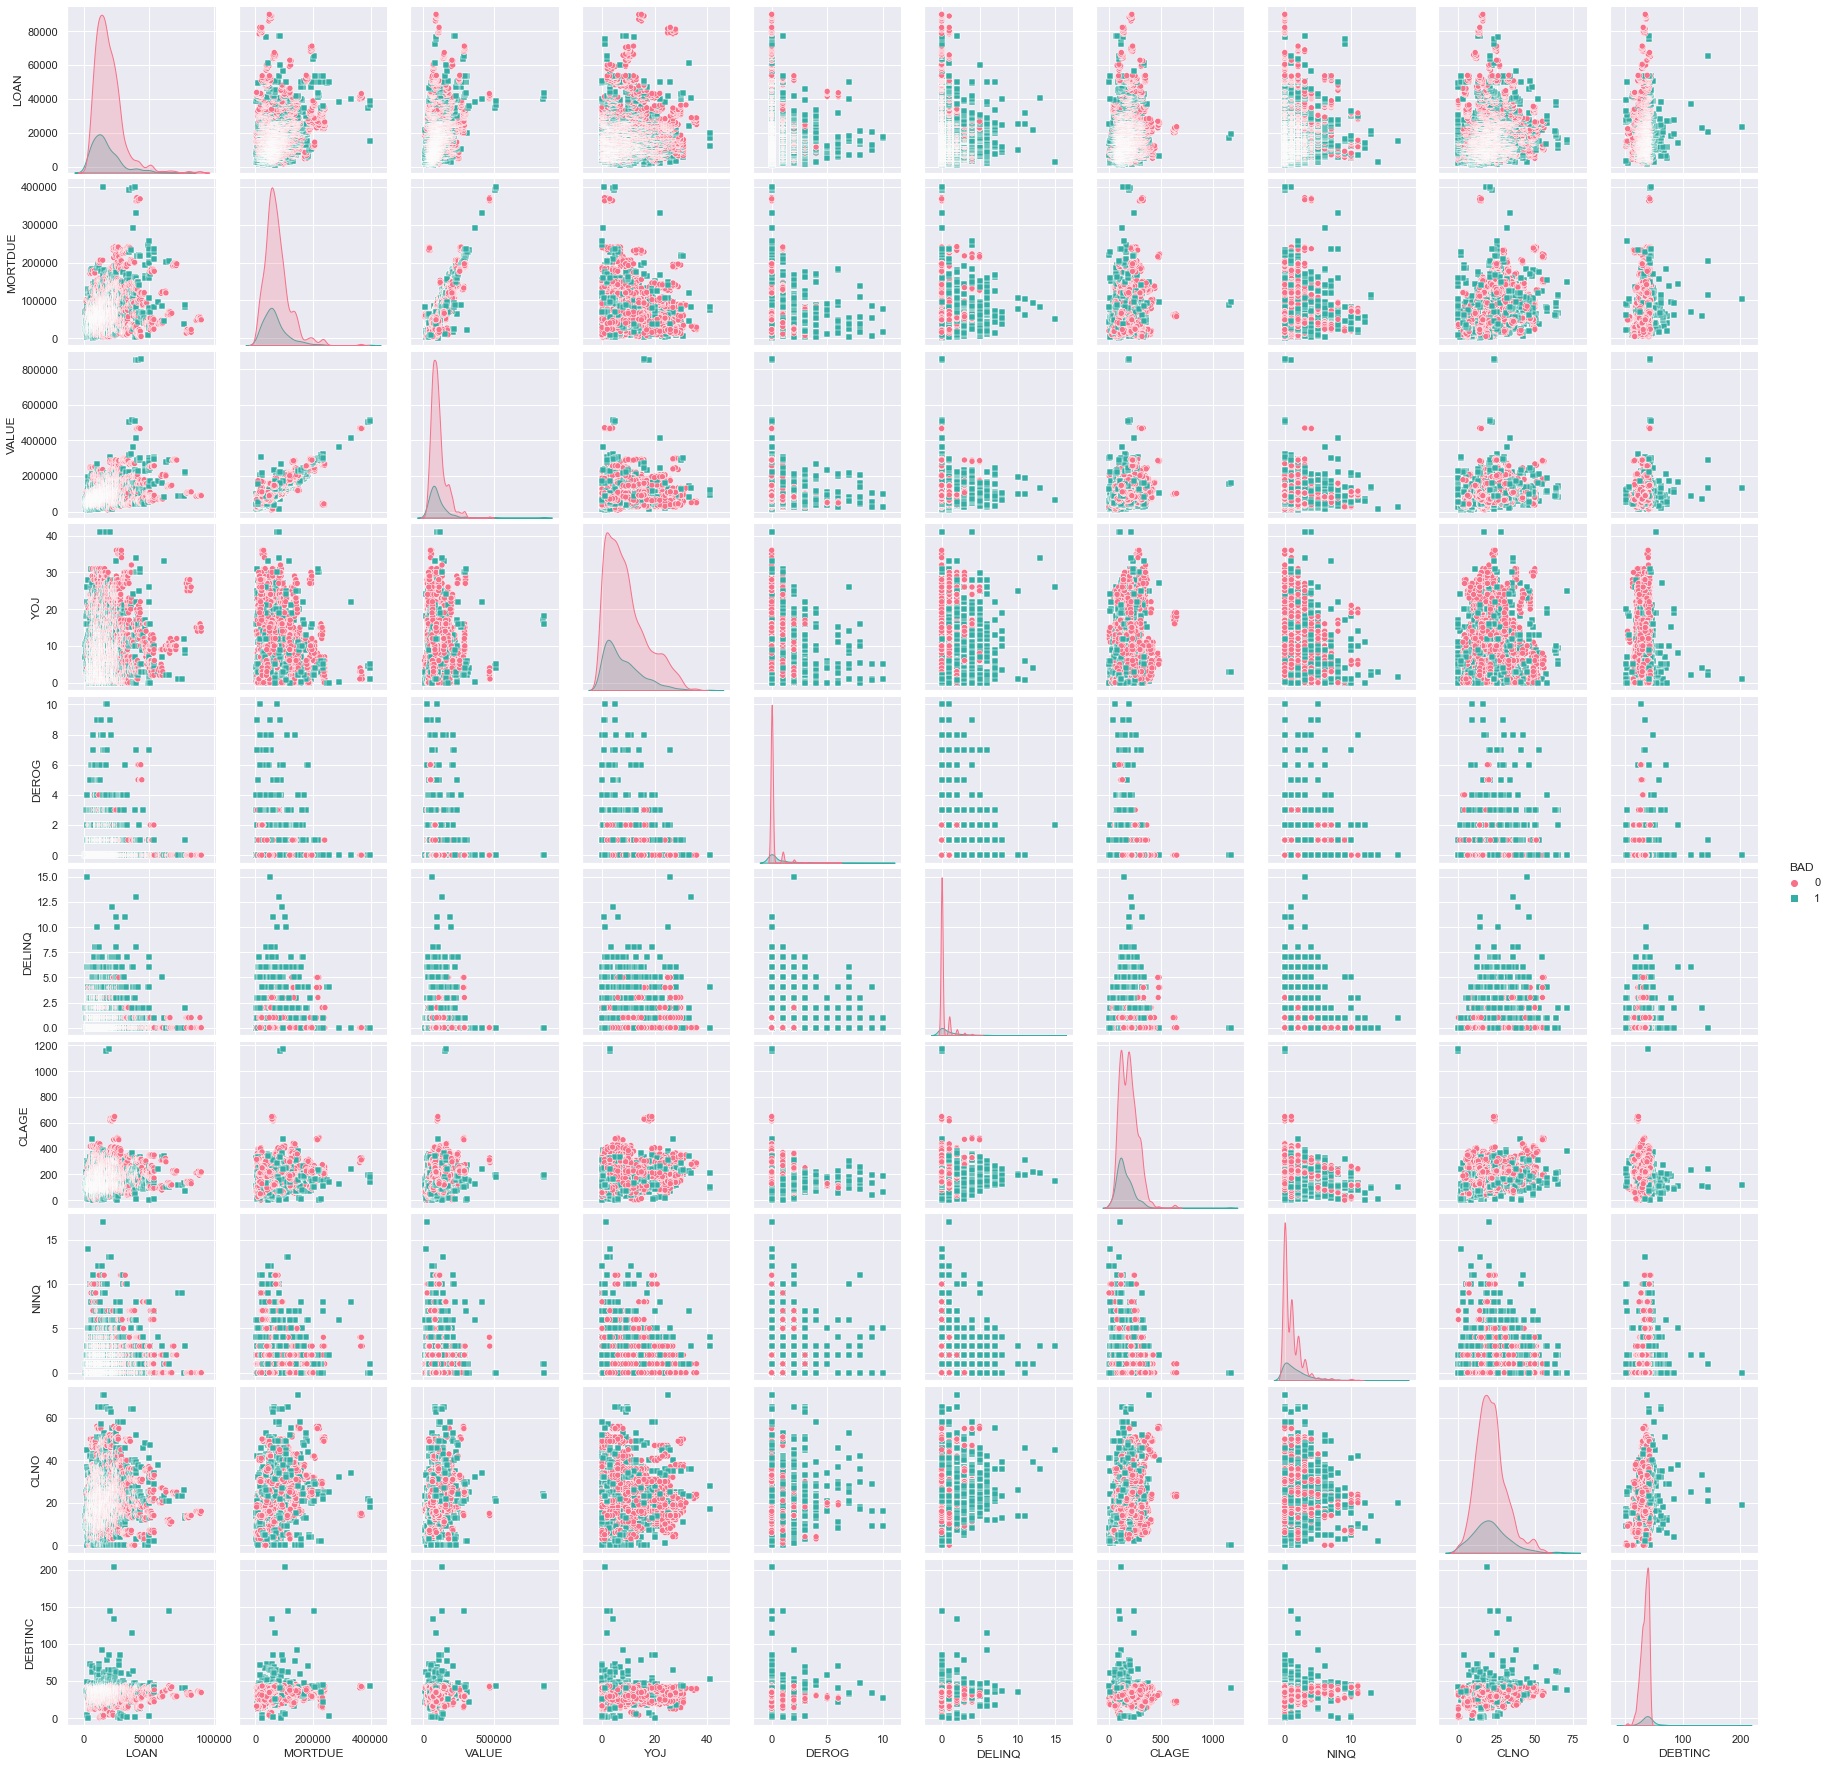

In [37]:
sns.pairplot(data=data,hue='BAD', markers=['o', 's'], palette='husl');

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 24**: <br>
    - In general, reduced values of `DELINQ` and `DEROG` mean load repaid.

<a id="M2.7"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">2.7 Key Fixes

**Dealing with outliers**

In [38]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3-Q1    # IQR Range
    Lower_Whisker = Q1-1.5*IQR  # define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [39]:
df_raw = data.copy()
numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns
df = treat_outliers_all(df_raw,numerical_col)

**Adding new columns in the dataset for each column which has missing values**

In [40]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [41]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

**Filling missing values in numerical columns with median and mode in categorical variables**

In [42]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(df[num_data.columns].median())

# Fill object columns with mode.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

**Checking for missing values**

In [43]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

**Saving the dataset**

In [44]:
df.to_csv('FinalData.csv', index=False)

**Looking for more insights on missing data**

BAD                             0     1   All
DEBTINC_missing_values_flag                  
False                        4290   403  4693
True                          481   786  1267
All                          4771  1189  5960
------------------------------------------------------------------------------------------------------------------------


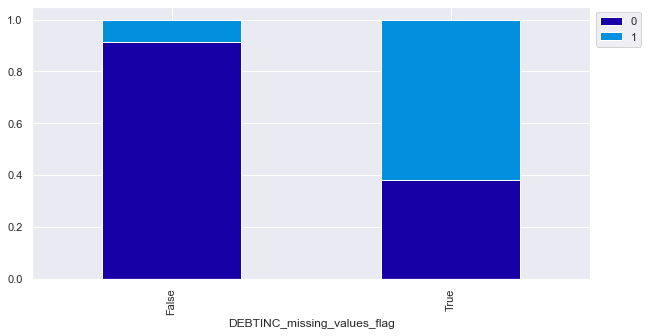

In [45]:
stacked_plot(df['DEBTINC_missing_values_flag'], df['BAD'])

<a id="N25"> </a>
<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 25**: <br>
- ~62\% of the clients missing `DEBTINC` info defaulted in loan. <br>
- ~9\% of the clients with `DEBTINC` info defaulted in loan.

BAD                           0     1   All
VALUE_missing_values_flag                  
False                      4764  1084  5848
True                          7   105   112
All                        4771  1189  5960
------------------------------------------------------------------------------------------------------------------------


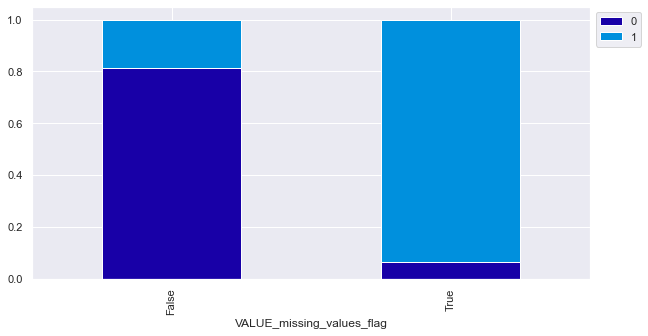

In [46]:
stacked_plot(df['VALUE_missing_values_flag'], df['BAD'])

<a id="N26"> </a>
<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 26**: <br>
- ~94\% of the clients missing `VALUE` info defaulted in loan. <br>
- ~19\% of the clients with `VALUE` info defaulted in loan.

<a id="M2.8"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">2.8 Summary of Notes

<span style="font-family: Arial; font-size:1.0em;color:#ff1616"> **Data description** <br>
- The dataset has 5960 rows and 13 columns. <br>
- REASON and JOB are of object type while the rest of the columns are of numeric type. <br>
- BAD is a binary variable and it represents a classification. It will be the target variable. <br>
- DEBTINC is the feature with more missing values (21.26%), DEROG has 11.88%, NINQ, MORTDUE, YOJ, and DELINQ have between 8-10% of missing values, while VALUE, REASON, JOB, CLAGE, and CLNO have less than 5.17% of missing values. <br>

<span style="font-family: Arial; font-size:1.0em;color:#ff1616"> **Observations** <br>
- The average amount of loan approved is about 18.5k. <br>
- Only 25% of the approved loans were over ~23.3k. <br>
- The average amount due on the existing mortgage is about 73.7k. <br>
- The average current value of the property is about 101.7k. <br>
- Only 25% of the property values were over ~119.8k. <br>
- The average longevity at the present job by applicants is about 9 years. <br>
- 75% of the applicants had been working at the same job for at least 3 years. <br>
- At least 75% of applications didn't present any major derogatory report. <br>
- At least 75% of applications didn't present any delinquent credit lines. <br>
- The average age of the oldest credit line is about 180 months. <br>
- At least 25% of the applications didn't present any recent credit inquiries. <br>
- 25% of the applications had more than 26 existing credit lines. <br>
- The average debt-to-income ratio is about 33.7. <br>
- At least 75% of the applications present a debt-to-income ratio inferior to 39, but there are some spikes and the maximum value is ~203. <br>
- BAD has ~80% of zeros (meaning loan repaid) and only ~20% of ones (meaning client defaulted on loan). <br>
- The main reason for the loan request is DebtCon (about 69% of applications). <br>
- LOAN is close to a symmetrical distribution. <br>
- MORTDUE has a right-skewed distribution, meaning only a few applications had a high amount due on the existing mortgage. <br>
- Only a few applications had the current value of the property above 200k. <br>
- A lot of applicants had new jobs. <br>
- 76% of applications didn't present any major derogatory report. <br>
- 70.1% of applications didn't present any delinquent credit lines. <br>
- CLAGE is close to a symmetrical distribution. <br>
- 42.5% of the applications didn't present any recent credit inquiries. <br>
- DEBTINC presents a pretty symmetrical distribution between 0 and 80, but it presents some outliers. <br>
- The main reason applicants request the loan is DebtCon. <br>
- The less usual job when requiring the loan is Sales. <br>
- There are much more loans repaid than clients defaulted on the loan. <br>
- The amount of loan approved seems to be unrelated to default. <br>
- The number of derogatory reports is much larger in clients who defaulted on the loan. <br>
- The number of delinquent credit lines is much larger in clients who defaulted on the loan. <br>
- The number of recent credit lines is much larger in clients who defaulted on the loan. <br>
- The amount due on the existing mortgage grows with the current value of the property, which is completely expected. <br>
- The reason why the loan is required does not interfere with default. <br>
- Most of the delinquency comes from sales industry applications. <br>
- The greatest existing correlation is between the MORTDUE and VALUE features. <br>
- In general, reduced values of DELINQ and DEROG mean load repaid. <br>
- ~62\% of the clients missing `DEBTINC` info defaulted in loan. <br>
- ~9\% of the clients with `DEBTINC` info defaulted in loan. <br>
- ~94\% of the clients missing `VALUE` info defaulted in loan. <br>
- ~19\% of the clients with `VALUE` info defaulted in loan.    

<span style="font-family: Arial; font-size:1.0em;color:#ff1616"> **Data Cleaning:** <br>
- The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. <br>
- This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature. <br>
- In this dataset, we have `YOJ` which is the number of **years** in the current job for applicants, and also `CLAGE` which is the age of the oldest credit line in **months**.

<a id="M3"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">3. Proposed Approach

<a id="M3.1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">3.1 Potential Techniques

- The model will be built from predictive modeling techniques based on Decision Trees because of the following factors:<br>
    - The model must be interpretable enough to provide a justification for any adverse behavior (rejections). <br>
    - The model needs to be immune to bad past decisions due to human errors. <br>


- The Decision Trees are simple to understand and interpret and mirror human decision-making more closely. Besides, they are open-box models, i.e., can visualize and understand the machine learning logic. <br>


- The following models are highlighted to be explored: <br>
    - **Model 1)** Logistic Regression.  <br>
    - **Model 2)** Decision Tree. <br>
    - **Model 3)** Random Forest. <br>
    

- The **Logistic Regression Model** will be tested in four versions, as follows: <br>
    - a)  No Feature Scaling. <br>
    - b)  No Feature Scaling with balanced precision-recall. <br>
    - c)  With Feature Scaling. <br>
    - d)  With Feature Scaling with balanced precision-recall. <br>
    

- The **Decision Trees and Random Forest models** will be tested in two versions as follows:
    - a)  Default Hyperparameters. <br>
    - b)  Tuned Hyperparameters. <br>


<a id="M3.2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">3.2 Overall solution design

- In order to establish the solution design, the original dataset will be brake down into two parts: Training Set and Test Set.
    - Training set: 70% of the data.
    - Test set: 30% of the data.
- All models will be explored using only the Training Set while the Test Set will be used to access their performances.

<a id="M3.3"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">3.3 Measures of success

**Model evaluation criterion**

**The models can make two types of wrong predictions:**


1. Predicting an applicant will default on a loan when the applicant doesn't default (False positive). <br>
2. Predicting an applicant will not default on a loan when the applicant actually defaults (False negative).


- In the first case, the bank will lose the opportunity to increase its profits from the loan. 
- In the second case, the bank will lose out on the loan.


- Therefore, the most important thing to avoid is false negatives, that is, predicting an applicant will not default on a loan when the applicant actually defaults.


- In this way, the bank would want the Recall to be maximized, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control the default rate especially.



- **Potential benefits of the candidate solutions** <br>
The final solution approach will be the one with the best performance over the **Test Set** (30\% of the population) based on the maximization of the **Recall**. In this way, the automatization of the process may allow a significant reduction in the loan default. Besides, it will also allow a better understanding of the important features to consider while approving a loan.

<a id="M4"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">4. Model Building

<a id="M4.1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">4.1 Data Preparation

**Separating the target variable from other variables**

In [47]:
df = pd.read_csv('FinalData.csv')

In [48]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(columns = ['BAD'])

# Create dummy variables for the categorical variables 
to_get_dummies_for = X.select_dtypes(['object', 'bool']).columns.tolist() 
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)

# Create y(dependent varibale)
y = df.BAD

**Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature. 

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [49]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 27**: <br>
- `CLAGE` is a feature scaled **in months**, while `YOJ` is scaled in **years**. <br>
- Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

**Splitting the data into 70% train and 30% test set** <br>
Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance, there could be several times more negative samples than positive samples. In such cases, it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

**Scaled Feature**

In [50]:
# Split the data into training and test set - Scaled X
x_train_S, x_test_S, y_train_S, y_test_S = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1, stratify = y)

**Non Scaled Feature**

In [51]:
# Split the data into training and test set - X
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

<a id="M4.2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">4.2 Model Evaluation Function

In [52]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Eligible', 'Not Eligible'], yticklabels=['Eligible', 'Not Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

<a id="M5"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">5. Logistic Regression Model

- Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

**Defining the Logistic regression model**

In [53]:
lg = LogisticRegression()

<a id="M5.1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">5.1 Log Reg

**Fitting the model on the training data**

In [54]:
lg.fit(x_train,y_train)

LogisticRegression()

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3340
           1       0.00      0.00      0.00       832

    accuracy                           0.80      4172
   macro avg       0.40      0.50      0.44      4172
weighted avg       0.64      0.80      0.71      4172



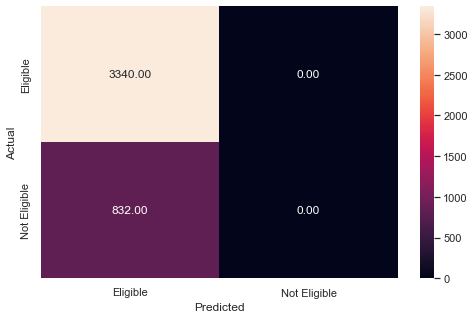

In [55]:
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1431
           1       0.00      0.00      0.00       357

    accuracy                           0.80      1788
   macro avg       0.40      0.50      0.44      1788
weighted avg       0.64      0.80      0.71      1788



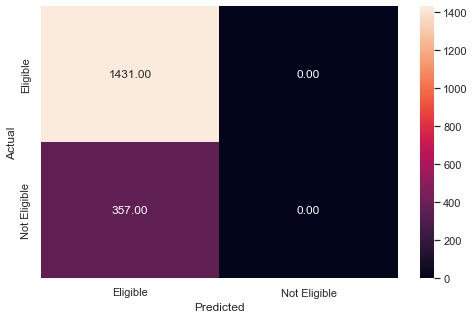

In [56]:
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Checking the importance of features** 

In [57]:
# The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. 
# We can convert the log of odds into odds by taking its exponential.
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
DEBTINC_missing_values_flag_True,1.000065
NINQ,1.000056
VALUE_missing_values_flag_True,1.000010
JOB_Self,1.000004
JOB_Sales,1.000002
VALUE,1.000001
CLAGE_missing_values_flag_True,1.000000
DEROG,1.000000
DELINQ,1.000000
CLNO_missing_values_flag_True,0.999999


<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 28**: Performance of logistic regression (No Feature Scaling) <br>
- This model had the same performance on both the train and test dataset: <br>
    - Accuracy of 80%. <br>
    - The recall is 100% for class 0 and 0% for class 1. <br>
    - The model is good at identifying the eligible customers, but it doesn't identify any non-eligible customers. <br>
    - As the model had identified all customers as eligible customers, all the features have roughly the same impact.

<a id="M5.2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B">5.2 Log Reg with Balanced Precision-Recall

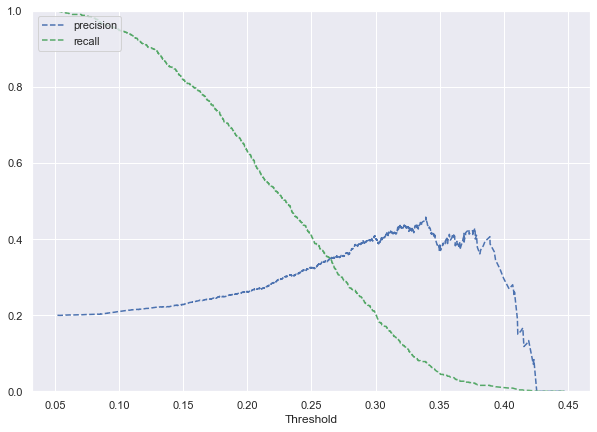

In [58]:
# The Precision-Recall Curve for Logistic Regression


y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

<span style="font-family: Arial; font-size:1.0em;color:#ff1616"> **Note 29**: The precision and the recall are balanced for a threshold of about 0.26.

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3340
           1       0.34      0.36      0.35       832

    accuracy                           0.73      4172
   macro avg       0.59      0.59      0.59      4172
weighted avg       0.74      0.73      0.74      4172



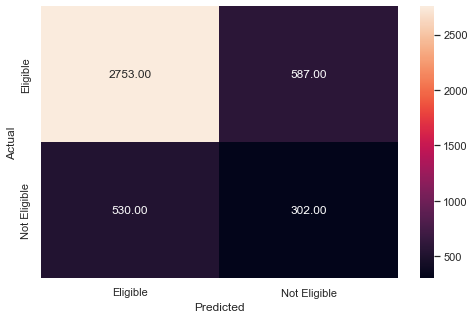

In [59]:
optimal_threshold1 = .26

y_pred_proba_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_proba_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1431
           1       0.34      0.38      0.36       357

    accuracy                           0.73      1788
   macro avg       0.59      0.60      0.59      1788
weighted avg       0.74      0.73      0.74      1788



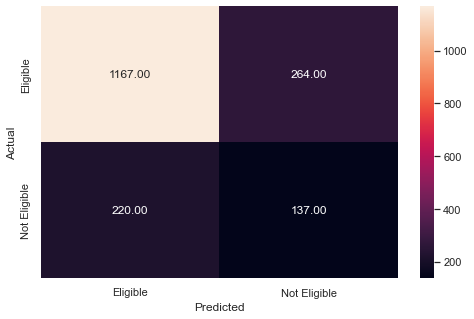

In [60]:
optimal_threshold1 = .26

y_pred_proba_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_proba_test[:, 1] > optimal_threshold1)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 30**: Performance of logistic regression (No Feature Scaling with balanced precision-recall): <br>
- Train dataset: <br>
    - Accuracy of 73%. <br>
    - The recall is 82% for class 0 and 36% for class 1.
- Test dataset: <br>
    - Accuracy of 73%. <br>
    - The recall is 82% for class 0 and 38% for class 1. <br>

<a id="M5.3"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 5.3 Log Reg with Scaled Feature

**Fitting the model on the training data**

In [61]:
lg.fit(x_train_S,y_train_S)

LogisticRegression()

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3340
           1       0.71      0.61      0.65       832

    accuracy                           0.87      4172
   macro avg       0.81      0.77      0.79      4172
weighted avg       0.87      0.87      0.87      4172



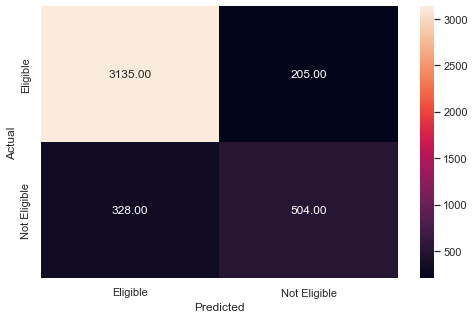

In [62]:
y_pred_train_S = lg.predict(x_train_S)
metrics_score(y_train_S, y_pred_train_S)

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1431
           1       0.74      0.59      0.66       357

    accuracy                           0.88      1788
   macro avg       0.82      0.77      0.79      1788
weighted avg       0.87      0.88      0.87      1788



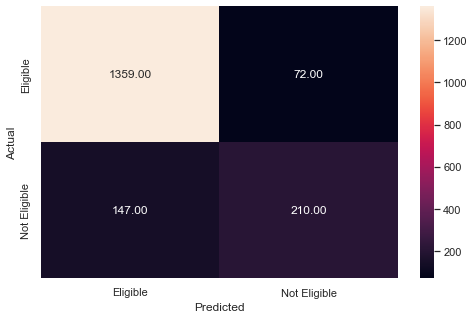

In [63]:
y_pred_test_S = lg.predict(x_test_S)
metrics_score(y_test_S, y_pred_test_S)

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 31**: Performance of logistic regression (Feature Scaling) <br>
- Train dataset: <br>
    - Accuracy of 87%. <br>
    - The recall is 94% for class 0 and 61% for class 1. <br>
- Test dataset: <br>
    - Accuracy of 88%. <br>
    - The recall is 95% for class 0 and 59% for class 1. <br>

<a id="M5.4"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 5.4 Log Reg with Scaled Feature and Balanced Precision-Recall

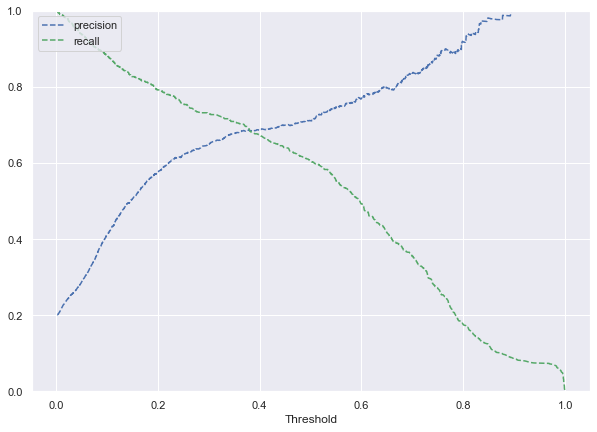

In [64]:
# The Precision-Recall Curve for Logistic Regression


y_scores_lg_S = lg.predict_proba(x_train_S) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train_S, y_scores_lg_S[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

<span style="font-family: Arial; font-size:1.0em;color:#ff1616"> **Note 32**: The precision and the recall are balanced for a threshold of about 0.37.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3340
           1       0.68      0.70      0.69       832

    accuracy                           0.88      4172
   macro avg       0.80      0.81      0.81      4172
weighted avg       0.88      0.88      0.88      4172



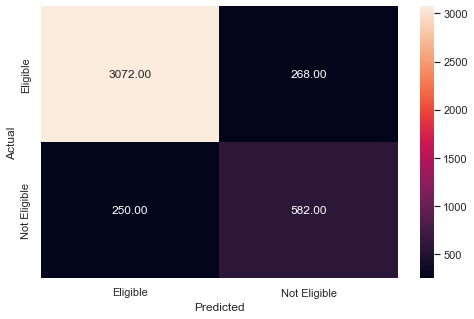

In [65]:
optimal_threshold2 = .37

y_pred_proba_train_S = lg.predict_proba(x_train_S)

metrics_score(y_train_S, y_pred_proba_train_S[:, 1] > optimal_threshold2)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1431
           1       0.71      0.68      0.69       357

    accuracy                           0.88      1788
   macro avg       0.81      0.81      0.81      1788
weighted avg       0.88      0.88      0.88      1788



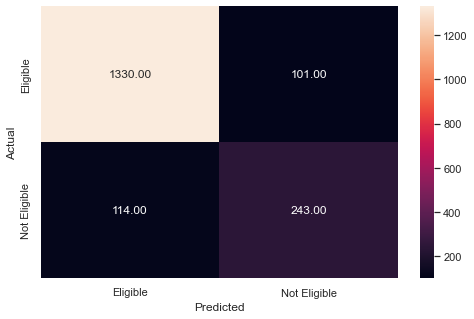

In [66]:
optimal_threshold1 = .37

y_pred_proba_test_S = lg.predict_proba(x_test_S)

metrics_score(y_test_S, y_pred_proba_test_S[:, 1] > optimal_threshold1)

<a id="M5.5"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 5.5 Overview of Log Reg Results

In [67]:
Y_PRED = [y_pred_test, y_pred_proba_test[:, 1] > optimal_threshold1, 
          y_pred_test_S, y_pred_proba_test_S[:, 1] > optimal_threshold2]

Y_TRUE = [y_test, y_test, y_test_S, y_test_S]

Res = np.empty((4,4),dtype=float)

for i in range(len(Y_PRED)):
    Res[i,:] = [classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['f1-score'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['recall'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['precision'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['accuracy']]

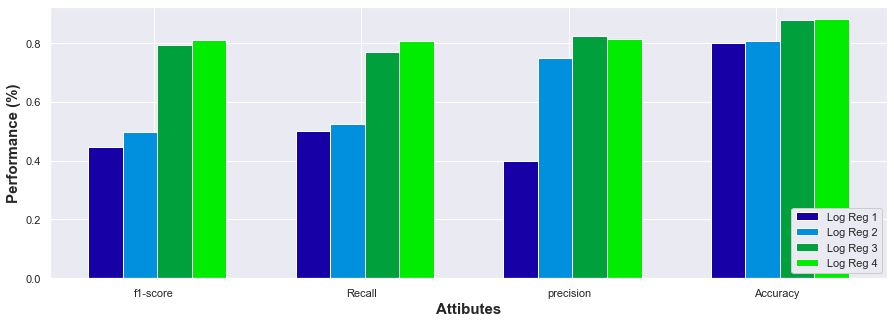

In [68]:
barWidth = -0.1
data_p = Res.T
x = np.arange(data_p.shape[0])
dx = (np.arange(data_p.shape[1])-data_p.shape[1]/2.)/(data_p.shape[1]+2.)
d = 1./(data_p.shape[1]+2.)


fig, ax=plt.subplots(figsize =(15, 5))
for i in range(data_p.shape[1]):
    ax.bar(x+dx[i],data_p[:,i], width=d, label="label {}".format(i))

mdl = ['Log Reg 1', 'Log Reg 2', 'Log Reg 3', 'Log Reg 4']
plt.legend(mdl, framealpha=1, loc='lower right')
plt.xlabel('Attibutes', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance (%)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Res[1]))],['f1-score', 'Recall', 'precision', 'Accuracy'])
plt.show()

In [69]:
print('Log Reg 1: Logistic Regression')
print('Log Reg 2: Logistic Regression with Balanced Precision-Recall')
print('Log Reg 3: Logistic Regression with Scaled Feature')
print('Log Reg 4: Logistic Regression with Scaled Feature and Balanced Precision-Recall')

Log Reg 1: Logistic Regression
Log Reg 2: Logistic Regression with Balanced Precision-Recall
Log Reg 3: Logistic Regression with Scaled Feature
Log Reg 4: Logistic Regression with Scaled Feature and Balanced Precision-Recall


<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 33**: Logistic Regression with balanced precision-recal and scaled feature had superior performance in Recal 1 (identifying customers defaulted on the loan) and good performances on accuracy and Recall 0 as well.

<a id="M6"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">6. Decision Tree (DT) Model

<a id="M6.1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 6.1 DT with Default Hyperparameters

**Defining Decision tree model**

In [70]:
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

**Fitting decision tree model**

In [71]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



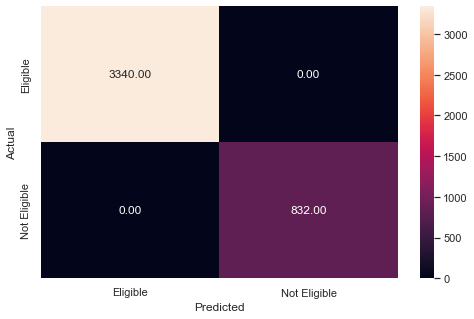

In [72]:
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Checking performance on the test dataset**

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1431
           1       0.66      0.59      0.62       357

    accuracy                           0.86      1788
   macro avg       0.78      0.76      0.77      1788
weighted avg       0.85      0.86      0.85      1788



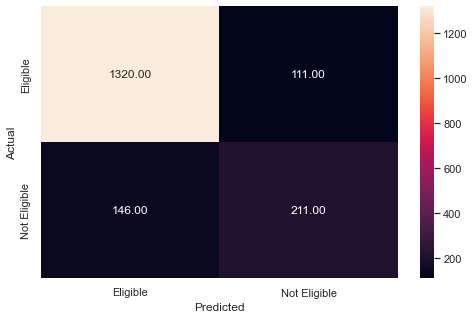

In [73]:
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Checking feature importance**

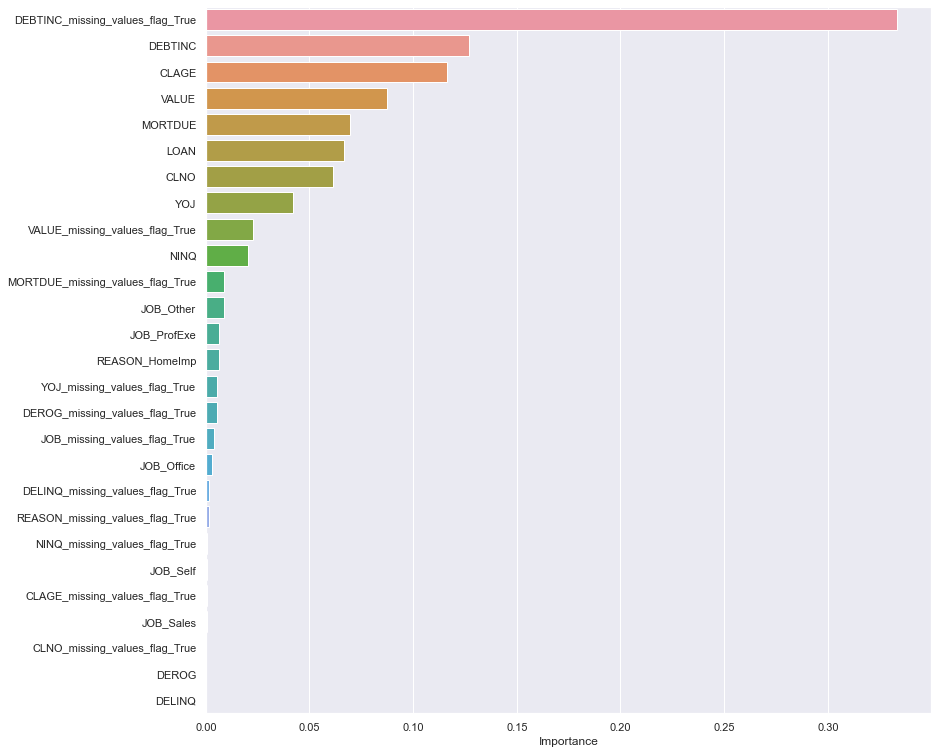

In [74]:
importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index);

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 34**: Performance of Decision Tree <br>
- Train dataset: <br>
    - Accuracy of 100%. <br>
    - The recall is 100% for class 0 and 100% for class 1. <br>
- Test dataset: <br>
    - Accuracy of 86%. <br>
    - The recall is 92% for class 0 and 59% for class 1. <br>
    
- The Decision Tree is overfitting the training data.
- According to the Decision Tree, miss the DEBTINC information is the most important feature, followed by DEBTINC values, CLAGE, and VALUE.

<a id="M6.2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 6.2 DT with Tuned Hyperparameters

**Using GridSearch for Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion{“gini”,  “entropy”}**

The function is to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [75]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       min_samples_leaf=10, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3340
           1       0.62      0.80      0.70       832

    accuracy                           0.86      4172
   macro avg       0.78      0.84      0.80      4172
weighted avg       0.88      0.86      0.87      4172



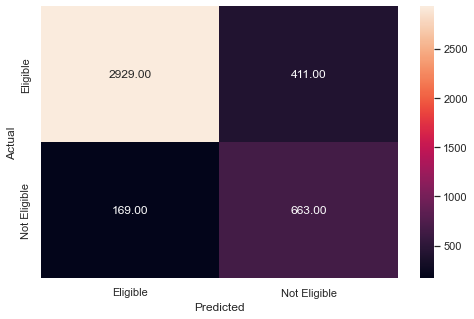

In [76]:
y_train_tun_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_tun_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1431
           1       0.61      0.76      0.67       357

    accuracy                           0.85      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.85      0.86      1788



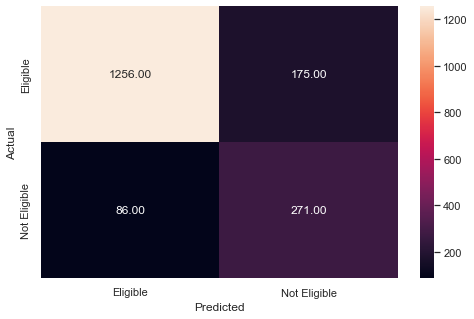

In [77]:
y_test_tun_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_tun_pred_dt)

**Checking feature importance**

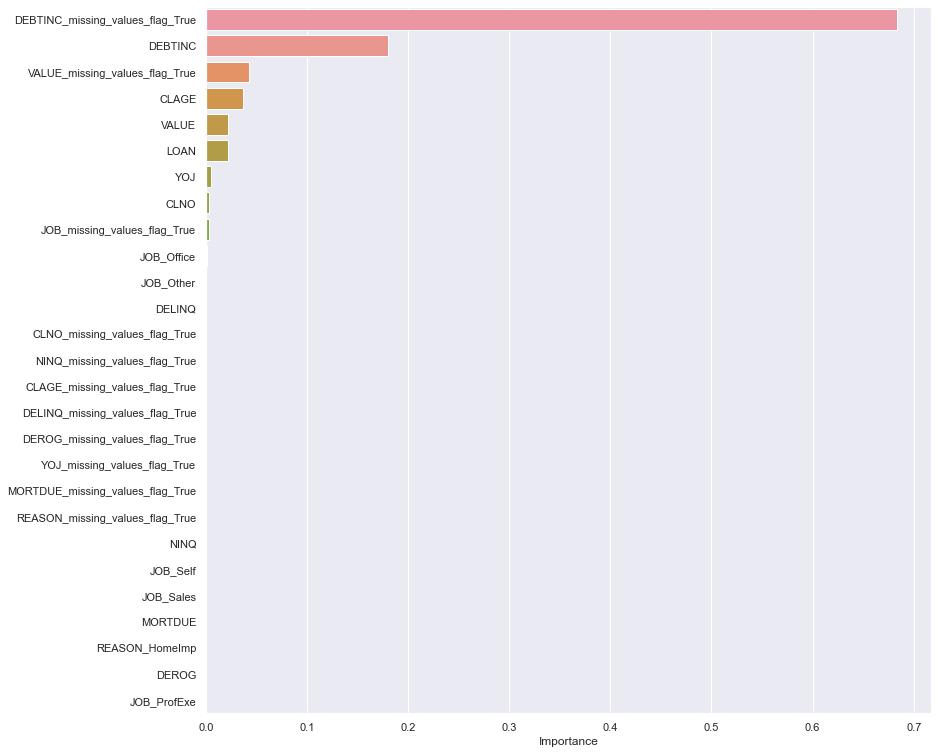

In [78]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index);

**Plotting the decision tree**

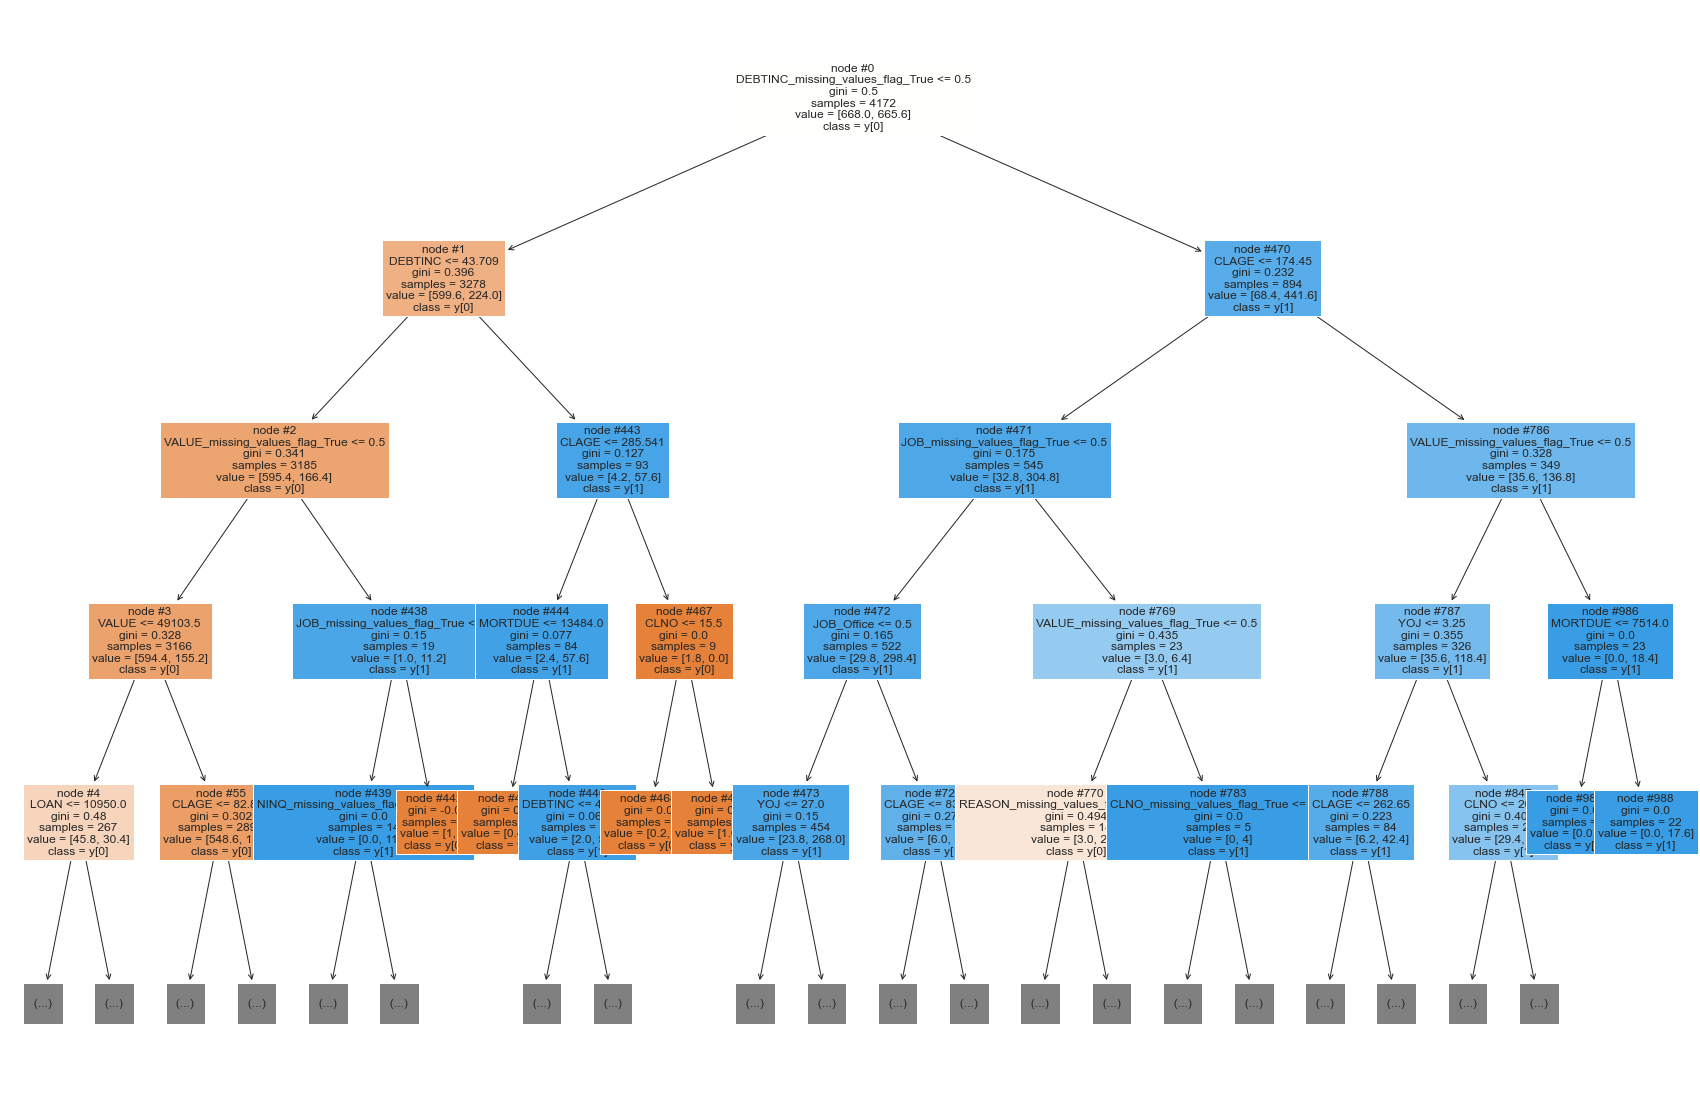

In [79]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 34**: Performance of DT with parameter tuning <br>
- Train dataset: <br>
    - Accuracy of 86\%. <br>
    - The recall is 88\% for class 0 and 80\% for class 1. <br>
- Test dataset: <br>
    - Accuracy of 85\%. <br>
    - The recall is 88\% for class 0 and 76\% for class 1. <br>
    
- In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly. This makes sense because we are trying to reduce overfitting.
- According to the tuned Decision Tree, miss the DEBTINC information is the most important feature, followed by DEBTINC values, miss the VALUE information, CLAGE, and VALUE.

<a id="M6.3"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 6.3 Overview of DT Results

In [80]:
Y_PRED = [y_test_pred_dt, y_test_tun_pred_dt]

Y_TRUE = [y_test, y_test]

Res = np.empty((2,4),dtype=float)

for i in range(len(Y_PRED)):
    Res[i,:] = [classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['f1-score'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['recall'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['precision'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['accuracy']]

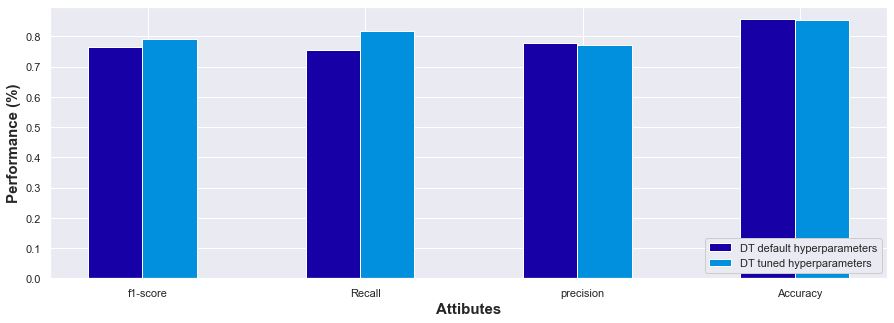

In [81]:
data_p = Res.T
x = np.arange(data_p.shape[0])
dx = (np.arange(data_p.shape[1])-data_p.shape[1]/2.)/(data_p.shape[1]+2.)
d = 1./(data_p.shape[1]+2.)


fig, ax=plt.subplots(figsize =(15, 5))
for i in range(data_p.shape[1]):
    ax.bar(x+dx[i],data_p[:,i], width=d, label="label {}".format(i))

mdl = ['DT default hyperparameters', 'DT tuned hyperparameters']
plt.legend(mdl, framealpha=1, loc='lower right')
plt.xlabel('Attibutes', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance (%)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Res[1]))],['f1-score', 'Recall', 'precision', 'Accuracy'])
plt.show()

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 34**: Decision Tree with tuned hyperparameters had superior performance on Recal, and good performances on accuracy, precision, and Recall 0 as well.

<a id="M7"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">7. Random Forest (RF) Model

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

<a id="M7.1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 7.1 RF with Default Hyperparameters

**Defining Random forest CLassifier**

In [82]:
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [83]:
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



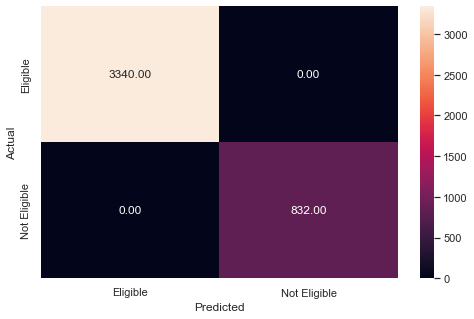

In [84]:
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Checking performance on the test dataset**

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1431
           1       0.76      0.63      0.69       357

    accuracy                           0.89      1788
   macro avg       0.84      0.79      0.81      1788
weighted avg       0.88      0.89      0.88      1788



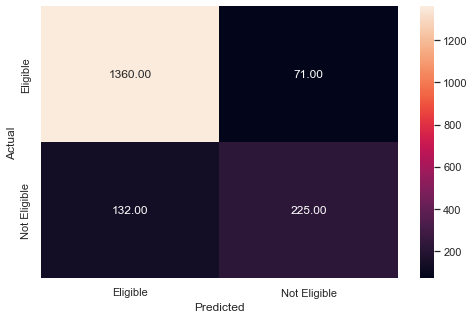

In [85]:
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Feature importance of the Random Forest**

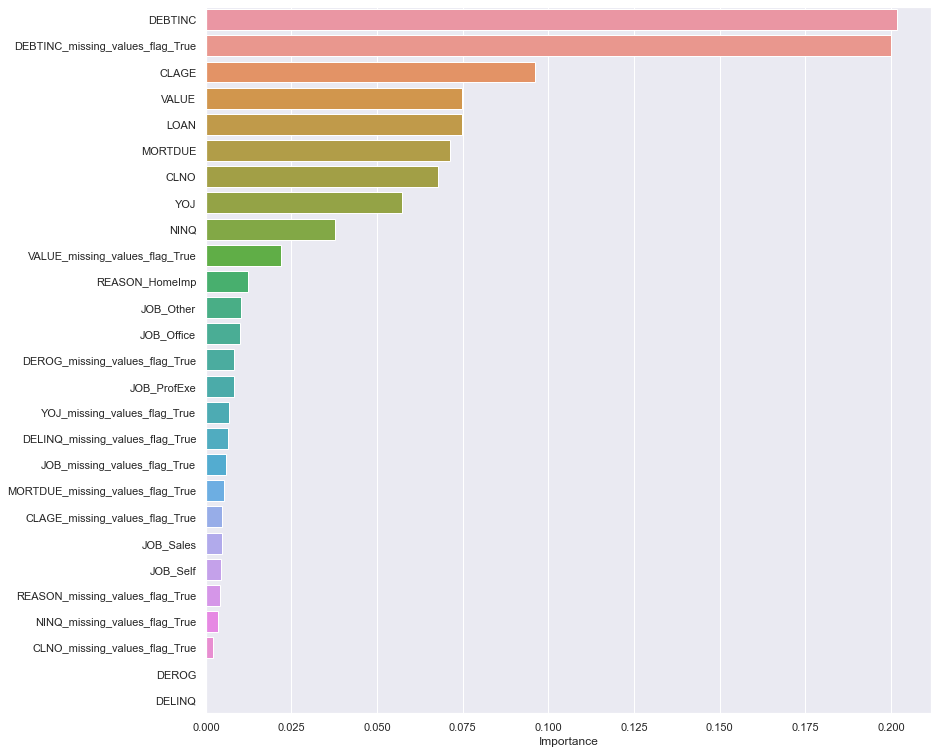

In [86]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index);

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 35**: According to the Random Forest model, DEBTINC is the most important feature, followed by missing the DEBTINC values, CLAGE, and VALUE.

<a id="M7.2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 7.2 RF with Tuned Hyperparameters

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.


In [87]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=3,
                       n_estimators=250, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      3340
           1       0.80      0.97      0.88       832

    accuracy                           0.95      4172
   macro avg       0.90      0.96      0.92      4172
weighted avg       0.95      0.95      0.95      4172



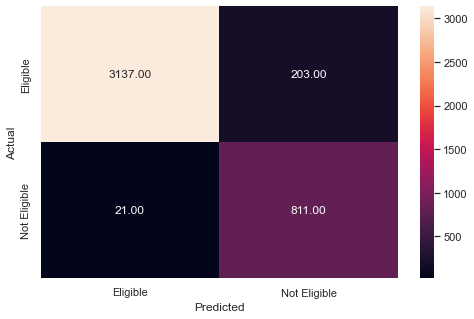

In [88]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1431
           1       0.69      0.75      0.71       357

    accuracy                           0.88      1788
   macro avg       0.81      0.83      0.82      1788
weighted avg       0.89      0.88      0.88      1788



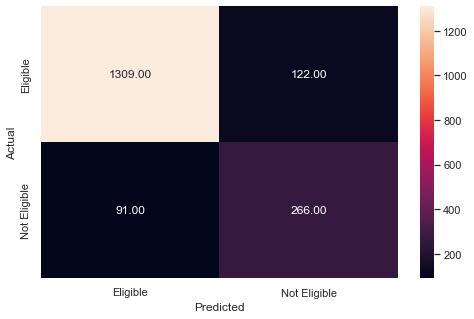

In [89]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Feature importance of the tuned Random Forest**

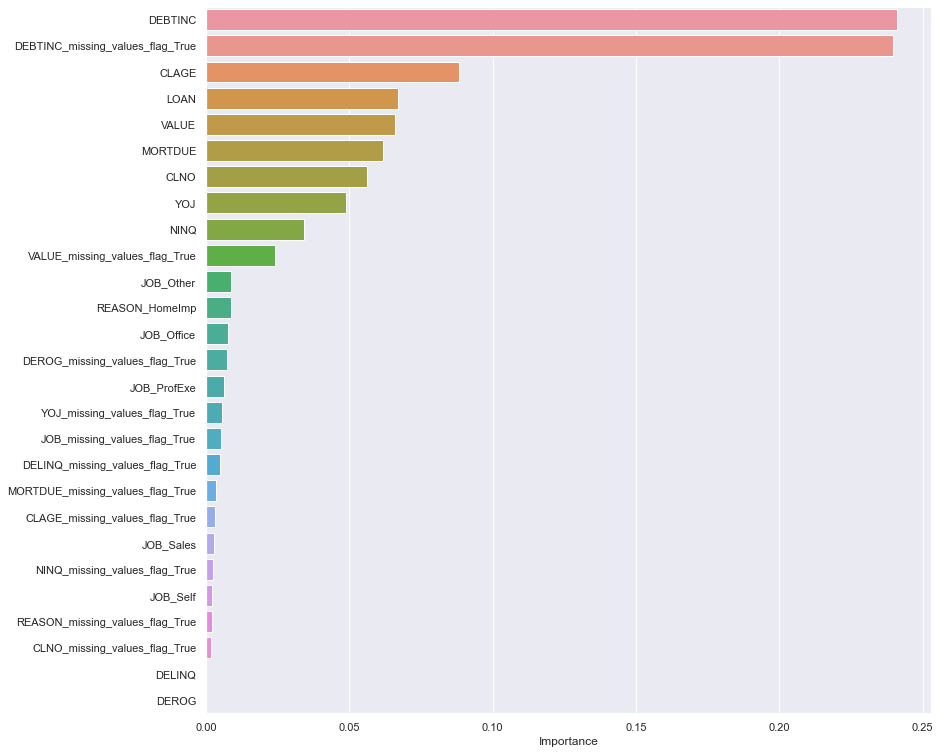

In [90]:
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index);

<a id="N36"> </a>
<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 36**: According to the tuned Random Forest model, DEBTINC is the most important feature, followed by missing the DEBTINC values, CLAGE, and LOAN.

<a id="M7.3"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 7.3 Overview of RF Results

In [91]:
Y_PRED = [y_pred_test_rf, y_pred_test_rf_tuned]

Y_TRUE = [y_test, y_test]

Res = np.empty((2,4),dtype=float)

for i in range(len(Y_PRED)):
    Res[i,:] = [classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['f1-score'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['recall'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['precision'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['accuracy']]

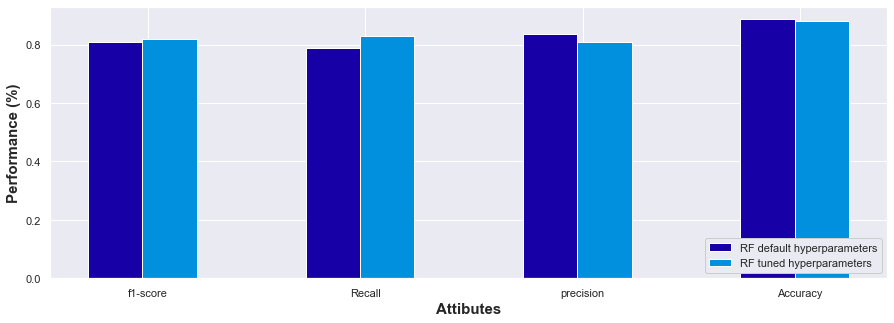

In [92]:
data_p = Res.T
x = np.arange(data_p.shape[0])
dx = (np.arange(data_p.shape[1])-data_p.shape[1]/2.)/(data_p.shape[1]+2.)
d = 1./(data_p.shape[1]+2.)


fig, ax=plt.subplots(figsize =(15, 5))
for i in range(data_p.shape[1]):
    ax.bar(x+dx[i],data_p[:,i], width=d, label="label {}".format(i))

mdl = ['RF default hyperparameters', 'RF tuned hyperparameters']
plt.legend(mdl, framealpha=1, loc='lower right')
plt.xlabel('Attibutes', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance (%)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Res[1]))],['f1-score', 'Recall', 'precision', 'Accuracy'])
plt.show()

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 37**: Random Forest with tuned hyperparameters has presented a superior performance regarding recall..

<a id="M8"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">8. Comparing Model Performances

In [93]:
models = ['Logistic Regression', 'Log Reg with Balanced Precision-Recall', 'Log Reg with Scaled Feature',
          'Log Reg with Scaled Feature and Balanced Precision-Recall', 'DT with Default Hyperparameters',
          'DT with Tuned Hyperparameters', 'RF Default Hyperparameters', 'RF with Tuned Hyperparameters']

Y_PRED = [y_pred_test, y_pred_proba_test[:, 1] > optimal_threshold1, y_pred_test_S, y_pred_proba_test_S[:, 1] > optimal_threshold2, y_test_pred_dt, y_test_tun_pred_dt, 
         y_pred_test_rf, y_pred_test_rf_tuned]

Y_TRUE = [y_test, y_test, y_test_S, y_test_S, y_test, y_test, y_test, y_test]

Res = np.empty((8,4),dtype=float)

for i in range(len(Y_PRED)):
    Res[i,:] = [classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['f1-score'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['recall'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['macro avg']['precision'],
               classification_report(Y_TRUE[i], Y_PRED[i], output_dict=True)['accuracy']]
Res = Res*100

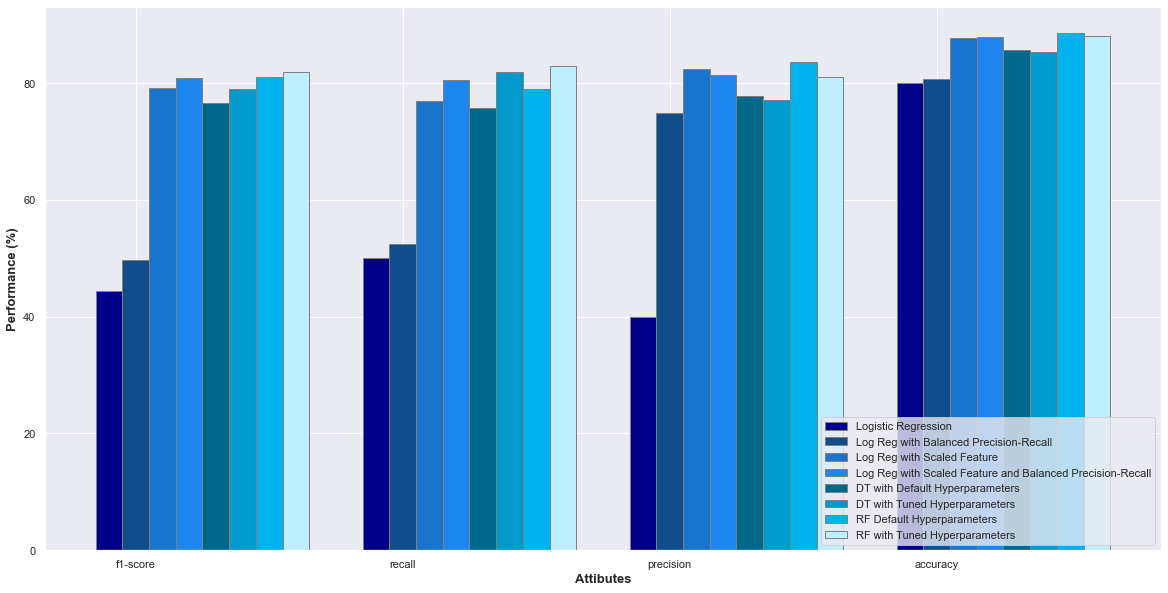

In [94]:
barWidth = 0.1
fig = plt.subplots(figsize =(20, 10))

# Set position of bar on X axis
br1 = np.arange(len(Res[0]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]

# Make the plot
plt.bar(br1, Res[0], color ='#00008B', width = barWidth, edgecolor ='grey', label = models[0])
plt.bar(br2, Res[1], color ='#104E8B', width = barWidth, edgecolor ='grey', label = models[1])
plt.bar(br3, Res[2], color ='#1874CD', width = barWidth, edgecolor ='grey', label = models[2])
plt.bar(br4, Res[3], color ='#1C86EE', width = barWidth, edgecolor ='grey', label = models[3])
plt.bar(br5, Res[4], color ='#00688B', width = barWidth, edgecolor ='grey', label = models[4])
plt.bar(br6, Res[5], color ='#009ACD', width = barWidth, edgecolor ='grey', label = models[5])
plt.bar(br7, Res[6], color ='#00B2EE', width = barWidth, edgecolor ='grey', label = models[6])
plt.bar(br8, Res[7], color ='#BFEFFF', width = barWidth, edgecolor ='grey', label = models[7])

# Adding Xticks
plt.xlabel('Attibutes', fontweight ='bold', fontsize = 13)
plt.ylabel('Performance (%)', fontweight ='bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(Res[0]))],['f1-score', 'recall', 'precision', 'accuracy'])
plt.legend(loc='lower right')
plt.show()

<span style="font-family: Arial; font-size:1.0em;color:#ff1616">**Note 38**: 
- Summary of models results:
    - **F1-Score > 80\%**
        - Logistic Regression with Scaling Feature and Balanced Precision-Recall.
        - Random Forest with Default Hyperparameters.
        - Random Forest with Tuned Hyperparameters.
    - **Recall > 80\%**
        - Logistic Regression with Scaling Feature and Balanced Precision-Recall.
        - Decision Tree with Tuned Hyperparameters.
        - Random Forest with Tuned Hyperparameters.
    - **Precision > 80\%**
        - Logistic Regression with Scaling Feature.
        - Logistic Regression with Scaling Feature and Balanced Precision-Recall.
        - Random Forest with Default Hyperparameters.
        - Random Forest with Tuned Hyperparameters.
    - **Accuracy > 80\%**
        - All of them.


- **Models with all attributes > 80\%**
    - Logistic Regression with Scaling Feature and Balanced Precision-Recall.
    - Random Forest with Tuned Hyperparameters.
    
- **Model with higher Recall**
    - Random Forest with Tuned Hyperparameters (~83\%)   

<a id="M9"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#6E1B1B">9. Conclusions and Busines Recomendations

<a id="M9.1"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 9.1 Answering the Key Questions

- **Key question 1: What drives loan default?**  <br>
- **Answer**: <br>
    - Customers with a high Debt-to income ratio tend to become defaulted on loans **([note 20](#N20))**.
        - 93% of customers with a Debt-to income ratio lower than 25 can afford the loan.
        - Roughly 50% of customers with a Debt-to income ratio higher than 43 have defaulted on the loan.
        - Customers with a Debt-to income ratio higher than 45 have always defaulted on the loan.
    - The reason why the loan is required does not interfere with default **([note 21](#N21))**.

- **Key question 2: What factors can be important to identify loan defaulters?** <br>
- **Answer**: <br>
- From the **Exploratory Data Analysis** Debt-to income ratio (`DEBTINC`) is the most important feature to be analyzed: <br>
    - When the customers do have the `DEBTINC` info in the loan application:
        - Customers with a high Debt-to income ratio tend to become defaulted on loans **([note 20](#N20))**.
        - ~9\% of the clients with `DEBTINC` info have defaulted on the loan **([Note 25](#N25))**. 
    - When the customers do not have the `DEBTINC` inifo in the loan application: 
        - ~62\% of the clients missing `DEBTINC` info have defaulted on the loan **([Note 25](#N25))**. 
- From the chosen model, **Random Forest with Tuned Hyperparameters**:
    - DEBTINC is the most important feature, followed by missing the DEBTINC values, CLAGE, and LOAN **([Note 36](#N36))**.
- Besides, when the customer miss the information regarding the **current value of property** (`VALUE`) they tend to become defaulted on loan: 
    - ~94\% of the clients missing `VALUE` info defaulted in loan **([Note 26](#N26))** 

- **Key question 3: How to model loan default as a function of other variables?** <br>
- **Answer**: <br>
- From the 13 input data, we can treat the binary variable indicating if a client has defaulted on a loan or not as the target and the remaining data as features.

- As the target is a binary variable, we can use the Logistic Regression model to classify a client given the 12 features.
    - In the Logistic Regression Model, we can analyze the impact of balancing precision-recall as well as scaling the features.

- We can use a Decision Tree and a Random Forest models to classify the clients based on the 12 features.
    - In these models, we can analyze the impact of tuning hyperparameters.

- We can choose the best model by analyzing the following attributes:
    - **Accuracy:** The fraction of classifications (eligible and not eligible clients) that the model has got correctly.
    - **Precision:** The fraction of **clients classified as not elegible** that are **actual not elegible clients**.
    - **Recall:** The fraction of **actual not eligible clients** that were **classified as not eligible clients**.
    - **F1-Score:** Weighted average of precision and recall
    
- As explained before, **RECALL** is the most important attribute (We want to avoid predicting an applicant is elegible when the applicant actually is not elegible), even though the other attributes have also to be taken into account in the final decision. 

- The best model is the **Random Forest with Tuned Hyperparameters**.

- **Key question 4: How to use this model to automate the decisions of loan approval?** <br>
- **Answer**: <br>
- Now, with the **Random Forest with Tuned Hyperparameters** model, a set of features of a new application can be classified in Eligible (predicting BAD = 0) and Not Eligible (predicting BAD=1).

- **Key question 5: How to cut down on losses by loan defaults?** <br>
- **Answer**: <br>

- The bank should not approve loans to those customers with a debt-to-income ratio higher than 40, as those customers have very high chances of defaulting. For those customers, the bank should consider approving the loan only if the age of the oldest credit line is superior to 285 months. 

- The bank should avoid approving loans in applications missing the debt-to-income ratio. 

<a id="M9.2"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 9.2 Busines Recommendations

- The bank should not approve loans to those customers with a debt-to-income ratio higher than 40, as those customers have very high chances of defaulting. For those customers, the bank should consider approving the loan only if the age of the oldest credit line is superior to 285 months. 

- The bank should pre-approve loans to those customers with a debt-to-income ratio of less than 25, (use the proposed model for the final decision) as those customers have very high chances of repaying.

- The bank should avoid approving loans in applications missing the debt-to-income ratio. 

- Missing value was identified as a characteristic of great importance in the decision-making of loan approval. In particular, missing values for the debt-to-income ratio and the current value of the property appeared as the main factors in several models tested.

- Thus, stakeholders should promote the importance of this information during the application for the loan to better identify customers with higher chances to default while improving the forecast model.

<a id="M9.3"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 9.3 Expected Benefits

- The proposed model was able to classify 91% of consumers who duly paid the loan as eligible consumers for the loan, and on the other hand, it was also able to classify 71% of consumers who defaulted on the loan as not eligible consumers.

- Thus, it can be concluded that the marginal loss of loan opportunities to eligible consumers is offset by the savings realized from not granting loans to the not eligible consumers.


<a id="M9.4"> </a>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#6E1B1B"> 9.4 Risks and Challenges

- Although the proposed model has effectively identified eligible and ineligible consumers for the loan, the model does not guarantee 100% accuracy. Thus, the model should be used to assist in decision-making.

- Finally, the proposed model will be more effective when used in loan applications with the same features considered in this study.
